# pyCisTopic scATAC processing

this code follows standard pycistopic tutorial with some slight adaptations: https://pycistopic.readthedocs.io/en/latest/notebooks/human_cerebellum.html

In [1]:
import pycisTopic
import pandas as pd
import os
pycisTopic.__version__

'2.0a0'

In [ ]:
!ls /atac/outs

20250709_cistopic_obj.pkl	   cistopic_obj.old.pkl    models.pkl
20250710_atac_ball_processed.h5ad  cistopic_obj.pkl	   qc
barcode_doublets_atac.csv	   consensus_peak_calling  region_sets


In [ ]:
!pwd

In [4]:
os.chdir(os.getcwd())

# Once the cistopic modeling is finished


Make sure it ran without any errors by checking the log files

In [ ]:
! cat logs/R-cistopic_modelling.*.out

In [ ]:
import pickle
file_path = "/outs/cistopic_obj.pkl"
with open(file_path, 'rb') as file:
    cistopic_obj = pickle.load(file)

print(cistopic_obj)

CistopicObject from project cisTopic_merge with n_cells × n_regions = 10268 × 190760


In [7]:
cistopic_obj.cell_data

barcode_rank  fraction_of_fragments_in_peaks  \
GTCTAGCTCCAGGATG-D0___D0          1403                        0.696985   
CACGGTTTCGTTAGTT-D0___D0          1118                        0.681807   
AAGTGAACATTGTGAG-D0___D0          1130                        0.720803   
AAAGGGATCGTCCTAA-D0___D0          1559                        0.714344   
ACAGCACCAAAGGTAA-D0___D0           930                        0.691150   
...                                ...                             ...   
GGAAGTAAGGTGGGAG-Q3___Q3          2361                        0.717342   
GCATTACGTAAGTGGC-Q3___Q3          2370                        0.478161   
GAGGGTGAGGTATGGT-Q3___Q3          2478                        0.680068   
TGGACCAAGGTTGTAA-Q3___Q3          2350                        0.728623   
CGGCTAGCATCCTAGT-Q3___Q3          2349                        0.595860   

                         cisTopic_nr_acc  log10_unique_fragments_count  \
GTCTAGCTCCAGGATG-D0___D0            3833                      3.763877   
CACGGTTTCGTTAGTT-D0___D0            5172                      3.910998   
AAGTGAACATTGTGAG-D0___D0            5523                      3.904391   
AAAGGGATCGTCCTAA-D0___D0            3373                      3.687886   
ACAGCACCAAAGGTAA-D0___D0            7075                      4.039850   
...                                  ...                           ...   
GGAAGTAAGGTGGGAG-Q3___Q3            1539                      3.342028   
GCATTACGTAAGTGGC-Q3___Q3             980                      3.337659   
GAGGGTGAGGTATGGT-Q3___Q3            1203                      3.247237   
TGGACCAAGGTTGTAA-Q3___Q3            1583                      3.346939   
CGGCTAGCATCCTAGT-Q3___Q3            1336                      3.346939   

                          duplication_count  tss_enrichment  \
GTCTAGCTCCAGGATG-D0___D0               1749       20.061720   
CACGGTTTCGTTAGTT-D0___D0               2353       18.499067   
AAGTGAACATTGTGAG-D0___D0               2315       17.083343   
AAAGGGATCGTCCTAA-D0___D0               1488       26.667670   
ACAGCACCAAAGGTAA-D0___D0               3157       16.882171   
...                                     ...             ...   
GGAAGTAAGGTGGGAG-Q3___Q3               1071       13.521482   
GCATTACGTAAGTGGC-Q3___Q3                905       13.003755   
GAGGGTGAGGTATGGT-Q3___Q3                877       15.620820   
TGGACCAAGGTTGTAA-Q3___Q3               1046       18.044076   
CGGCTAGCATCCTAGT-Q3___Q3                957       11.784702   

                         cisTopic_log_nr_acc  \
GTCTAGCTCCAGGATG-D0___D0            3.583539   
CACGGTTTCGTTAGTT-D0___D0            3.713659   
AAGTGAACATTGTGAG-D0___D0            3.742175   
AAAGGGATCGTCCTAA-D0___D0            3.528016   
ACAGCACCAAAGGTAA-D0___D0            3.849726   
...                                      ...   
GGAAGTAAGGTGGGAG-Q3___Q3            3.187239   
GCATTACGTAAGTGGC-Q3___Q3            2.991226   
GAGGGTGAGGTATGGT-Q3___Q3            3.080266   
TGGACCAAGGTTGTAA-Q3___Q3            3.199481   
CGGCTAGCATCCTAGT-Q3___Q3            3.125806   

                          pdf_values_for_duplication_ratio cisTopic_nr_frag  \
GTCTAGCTCCAGGATG-D0___D0                         13.634188             4309   
CACGGTTTCGTTAGTT-D0___D0                         21.064461             5971   
AAGTGAACATTGTGAG-D0___D0                         20.992568             6296   
AAAGGGATCGTCCTAA-D0___D0                          9.928649             3763   
ACAGCACCAAAGGTAA-D0___D0                         20.009237             8168   
...                                                    ...              ...   
GGAAGTAAGGTGGGAG-Q3___Q3                         10.617857             1728   
GCATTACGTAAGTGGC-Q3___Q3                          4.243089             1123   
GAGGGTGAGGTATGGT-Q3___Q3                          3.498081             1309   
TGGACCAAGGTTGTAA-Q3___Q3                         19.379643             1755   
CGGCTAGCATCCTAGT-Q3___Q3                     

In [ ]:
file_path = "/outs/models.pkl"
with open(file_path, 'rb') as file:
    models = pickle.load(file)

print(models)

/opt/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-07-10 11:50:27,027	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


[<pycisTopic.lda_models.CistopicLDAModel object at 0x1465464a17d0>, <pycisTopic.lda_models.CistopicLDAModel object at 0x1465136cd610>, <pycisTopic.lda_models.CistopicLDAModel object at 0x14651094cc10>, <pycisTopic.lda_models.CistopicLDAModel object at 0x1465109504d0>, <pycisTopic.lda_models.CistopicLDAModel object at 0x146510953fd0>, <pycisTopic.lda_models.CistopicLDAModel object at 0x146510967c90>, <pycisTopic.lda_models.CistopicLDAModel object at 0x146510973e10>, <pycisTopic.lda_models.CistopicLDAModel object at 0x146510977f90>, <pycisTopic.lda_models.CistopicLDAModel object at 0x146510988550>, <pycisTopic.lda_models.CistopicLDAModel object at 0x146510990d10>, <pycisTopic.lda_models.CistopicLDAModel object at 0x146510999750>]


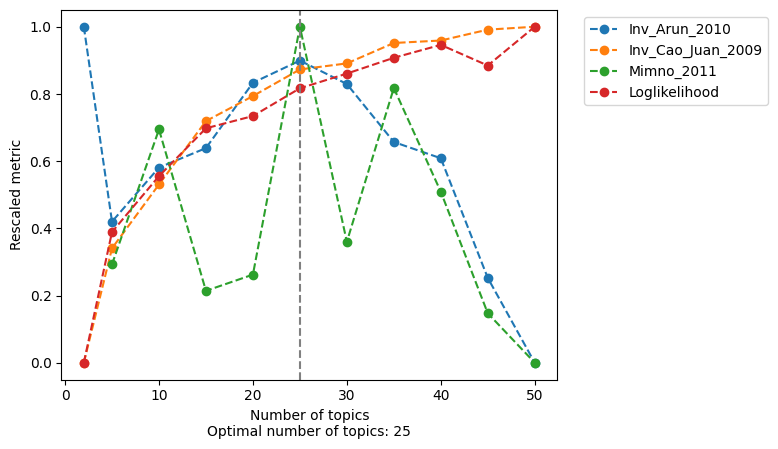

In [9]:
from pycisTopic.lda_models import evaluate_models
model = evaluate_models(
    models,
    select_model = 25,
    return_model = True
)

choosing model with 25 topics

In [10]:
cistopic_obj.add_LDA_model(model)

In [11]:
out_dir = "outs"
os.makedirs(out_dir, exist_ok = True)

In [12]:
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "cistopic_obj.pkl"), "wb")
)

# Clustering and visualisation

In [13]:
from pycisTopic.clust_vis import (
    find_clusters,
    run_umap,
    run_tsne,
    plot_metadata,
    plot_topic,
    cell_topic_heatmap
)

In [14]:
find_clusters(
    cistopic_obj,
    target  = 'cell',
    k = 10,
    res = [0.2,0.3,0.6, 1.2, 3,6],
    prefix = 'pycisTopic_',
    scale = True,
    split_pattern = '-'
)

2025-07-10 11:50:34,324 cisTopic     INFO     Finding neighbours


In [15]:
# sanity check that I removed all scATAC doublets
cistopic_obj.cell_data[(cistopic_obj.cell_data.total_fragments_count) > 60000]

Empty DataFrame
Columns: [barcode_rank, fraction_of_fragments_in_peaks, cisTopic_nr_acc, log10_unique_fragments_count, duplication_count, tss_enrichment, cisTopic_log_nr_acc, pdf_values_for_duplication_ratio, cisTopic_nr_frag, pdf_values_for_tss_enrichment, log10_total_fragments_in_peaks_count, pdf_values_for_fraction_of_fragments_in_peaks, log10_total_fragments_count, total_fragments_count, doublets_atac, unique_fragments_count, cisTopic_log_nr_frag, unique_fragments_in_peaks_count, barcode, duplication_ratio, log10_unique_fragments_in_peaks_count, doublet_outlier, total_fragments_in_peaks_count, cell_type, sample_id, pycisTopic_leiden_10_0.2, pycisTopic_leiden_10_0.3, pycisTopic_leiden_10_0.6, pycisTopic_leiden_10_1.2, pycisTopic_leiden_10_3, pycisTopic_leiden_10_6]
Index: []

[0 rows x 31 columns]

In [16]:
cistopic_obj.cell_data

barcode_rank  fraction_of_fragments_in_peaks  \
GTCTAGCTCCAGGATG-D0___D0          1403                        0.696985   
CACGGTTTCGTTAGTT-D0___D0          1118                        0.681807   
AAGTGAACATTGTGAG-D0___D0          1130                        0.720803   
AAAGGGATCGTCCTAA-D0___D0          1559                        0.714344   
ACAGCACCAAAGGTAA-D0___D0           930                        0.691150   
...                                ...                             ...   
GGAAGTAAGGTGGGAG-Q3___Q3          2361                        0.717342   
GCATTACGTAAGTGGC-Q3___Q3          2370                        0.478161   
GAGGGTGAGGTATGGT-Q3___Q3          2478                        0.680068   
TGGACCAAGGTTGTAA-Q3___Q3          2350                        0.728623   
CGGCTAGCATCCTAGT-Q3___Q3          2349                        0.595860   

                         cisTopic_nr_acc  log10_unique_fragments_count  \
GTCTAGCTCCAGGATG-D0___D0            3833                      3.763877   
CACGGTTTCGTTAGTT-D0___D0            5172                      3.910998   
AAGTGAACATTGTGAG-D0___D0            5523                      3.904391   
AAAGGGATCGTCCTAA-D0___D0            3373                      3.687886   
ACAGCACCAAAGGTAA-D0___D0            7075                      4.039850   
...                                  ...                           ...   
GGAAGTAAGGTGGGAG-Q3___Q3            1539                      3.342028   
GCATTACGTAAGTGGC-Q3___Q3             980                      3.337659   
GAGGGTGAGGTATGGT-Q3___Q3            1203                      3.247237   
TGGACCAAGGTTGTAA-Q3___Q3            1583                      3.346939   
CGGCTAGCATCCTAGT-Q3___Q3            1336                      3.346939   

                          duplication_count  tss_enrichment  \
GTCTAGCTCCAGGATG-D0___D0               1749       20.061720   
CACGGTTTCGTTAGTT-D0___D0               2353       18.499067   
AAGTGAACATTGTGAG-D0___D0               2315       17.083343   
AAAGGGATCGTCCTAA-D0___D0               1488       26.667670   
ACAGCACCAAAGGTAA-D0___D0               3157       16.882171   
...                                     ...             ...   
GGAAGTAAGGTGGGAG-Q3___Q3               1071       13.521482   
GCATTACGTAAGTGGC-Q3___Q3                905       13.003755   
GAGGGTGAGGTATGGT-Q3___Q3                877       15.620820   
TGGACCAAGGTTGTAA-Q3___Q3               1046       18.044076   
CGGCTAGCATCCTAGT-Q3___Q3                957       11.784702   

                         cisTopic_log_nr_acc  \
GTCTAGCTCCAGGATG-D0___D0            3.583539   
CACGGTTTCGTTAGTT-D0___D0            3.713659   
AAGTGAACATTGTGAG-D0___D0            3.742175   
AAAGGGATCGTCCTAA-D0___D0            3.528016   
ACAGCACCAAAGGTAA-D0___D0            3.849726   
...                                      ...   
GGAAGTAAGGTGGGAG-Q3___Q3            3.187239   
GCATTACGTAAGTGGC-Q3___Q3            2.991226   
GAGGGTGAGGTATGGT-Q3___Q3            3.080266   
TGGACCAAGGTTGTAA-Q3___Q3            3.199481   
CGGCTAGCATCCTAGT-Q3___Q3            3.125806   

                          pdf_values_for_duplication_ratio cisTopic_nr_frag  \
GTCTAGCTCCAGGATG-D0___D0                         13.634188             4309   
CACGGTTTCGTTAGTT-D0___D0                         21.064461             5971   
AAGTGAACATTGTGAG-D0___D0                         20.992568             6296   
AAAGGGATCGTCCTAA-D0___D0                          9.928649             3763   
ACAGCACCAAAGGTAA-D0___D0                         20.009237             8168   
...                                                    ...              ...   
GGAAGTAAGGTGGGAG-Q3___Q3                         10.617857             1728   
GCATTACGTAAGTGGC-Q3___Q3                          4.243089             1123   
GAGGGTGAGGTATGGT-Q3___Q3                          3.498081             1309   
TGGACCAAGGTTGTAA-Q3___Q3                         19.379643             1755   
CGGCTAGCATCCTAGT-Q3___Q3                     

In [17]:
cistopic_obj.projections["cell"] = {}

In [18]:
run_umap(
    cistopic_obj,
    target  = 'cell', scale=True)

2025-07-10 11:50:41,160 cisTopic     INFO     Running UMAP


/opt/venv/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [19]:
run_tsne(
    cistopic_obj,
    target  = 'cell', scale=True)

2025-07-10 11:51:07,239 cisTopic     INFO     Running TSNE


In [20]:
cistopic_obj.projections

{'cell': {'UMAP':                              UMAP_1    UMAP_2
  GTCTAGCTCCAGGATG-D0___D0   9.191319  0.255108
  CACGGTTTCGTTAGTT-D0___D0  12.987503  0.245214
  AAGTGAACATTGTGAG-D0___D0  12.143802 -0.163639
  AAAGGGATCGTCCTAA-D0___D0   3.833550  0.554670
  ACAGCACCAAAGGTAA-D0___D0  13.126408 -0.562548
  ...                             ...       ...
  GGAAGTAAGGTGGGAG-Q3___Q3   2.287822  8.751452
  GCATTACGTAAGTGGC-Q3___Q3   5.835944  5.257241
  GAGGGTGAGGTATGGT-Q3___Q3   3.186113  9.133414
  TGGACCAAGGTTGTAA-Q3___Q3   3.018402  9.133658
  CGGCTAGCATCCTAGT-Q3___Q3   3.327187  8.694397
  
  [10268 rows x 2 columns],
  'tSNE':                              tSNE_1     tSNE_2
  GTCTAGCTCCAGGATG-D0___D0  57.468529 -31.292042
  CACGGTTTCGTTAGTT-D0___D0  21.358091 -57.879974
  AAGTGAACATTGTGAG-D0___D0  34.268833 -65.959686
  AAAGGGATCGTCCTAA-D0___D0  53.125278  -6.952516
  ACAGCACCAAAGGTAA-D0___D0  32.774239 -52.585495
  ...                             ...        ...
  GGAAGTAAGGTGGGAG-Q3___Q3

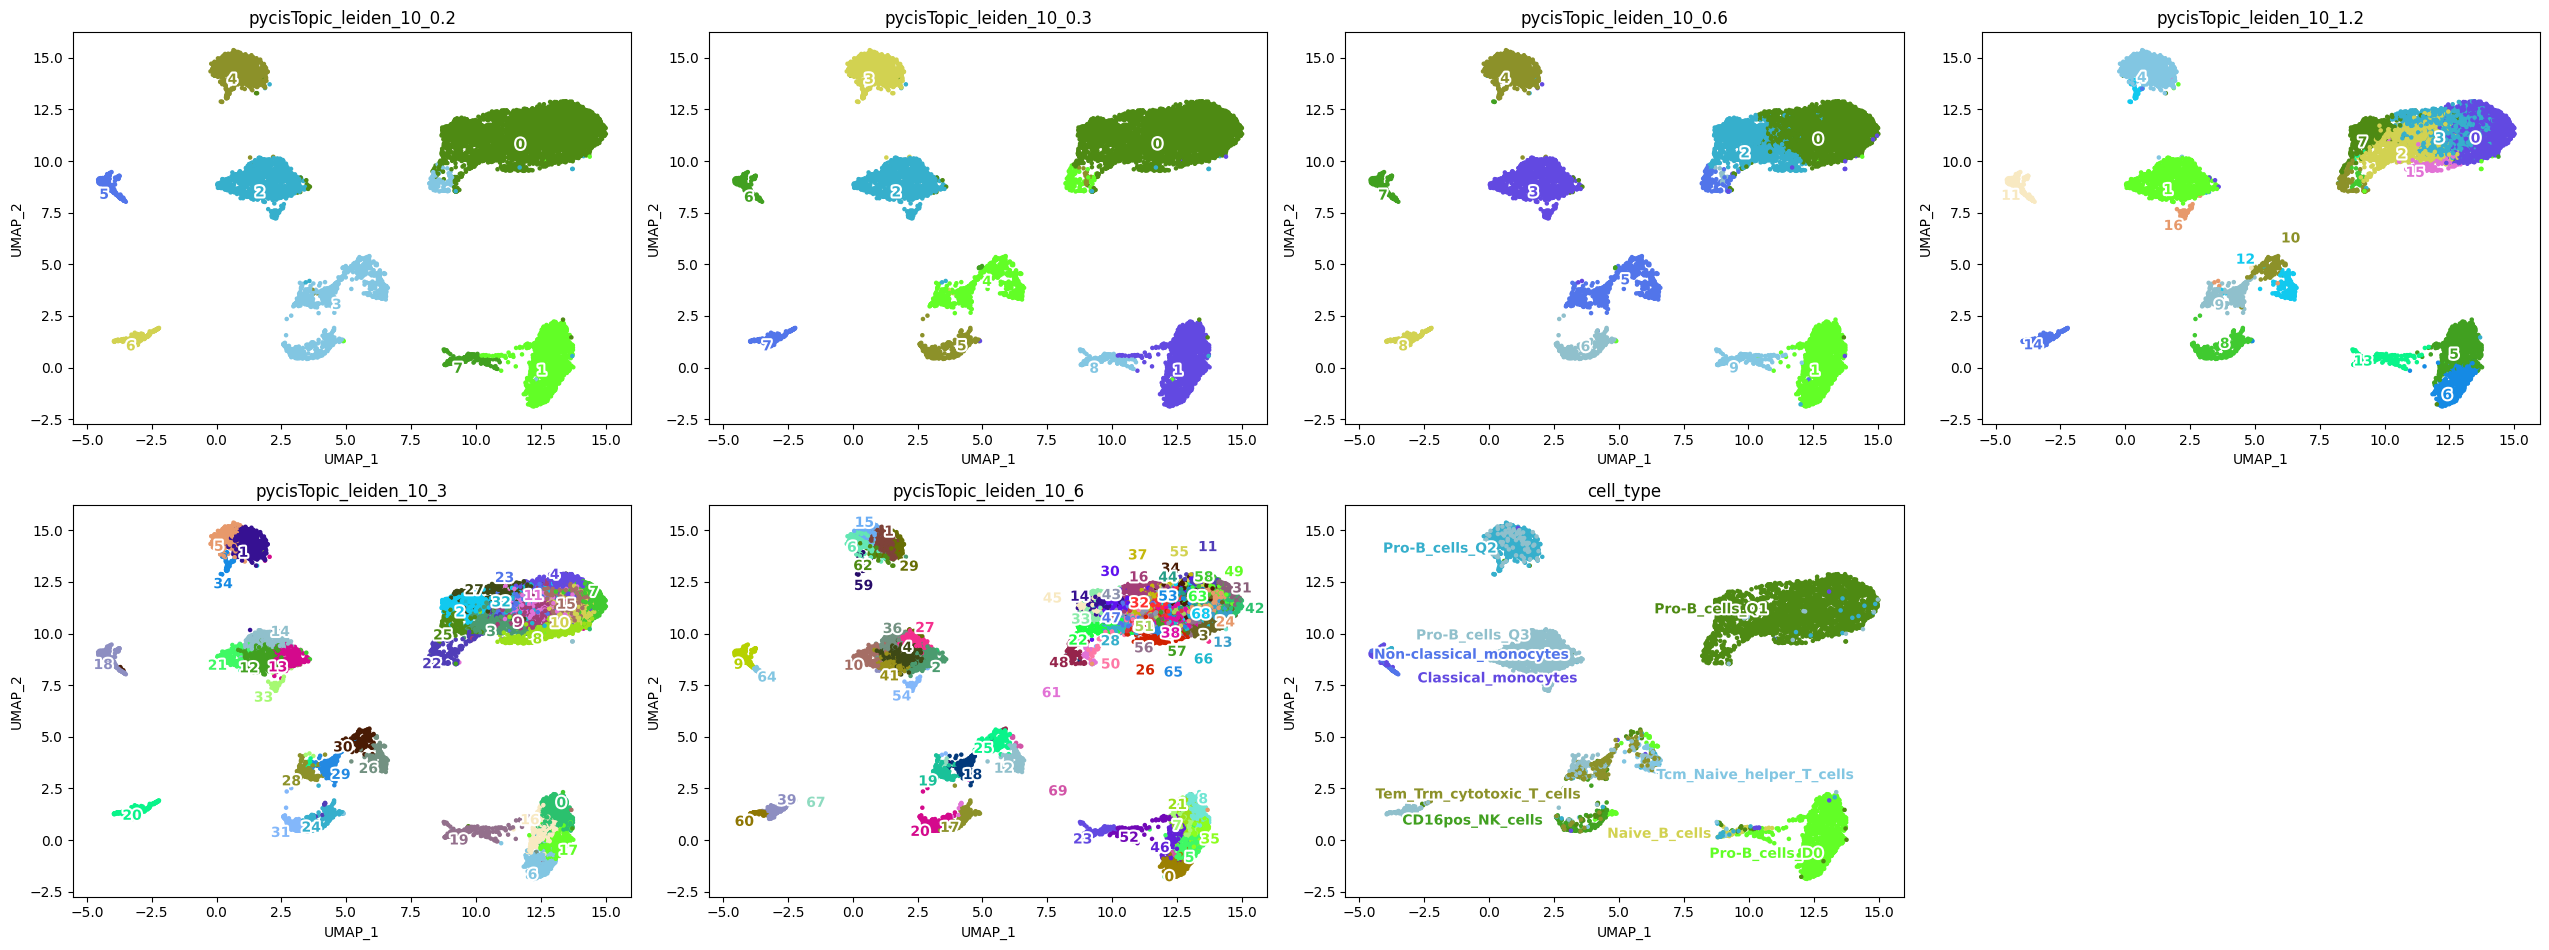

In [21]:
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['pycisTopic_leiden_10_0.2', 'pycisTopic_leiden_10_0.3','pycisTopic_leiden_10_0.6', 'pycisTopic_leiden_10_1.2', 'pycisTopic_leiden_10_3','pycisTopic_leiden_10_6','cell_type'],
    target='cell', num_columns=4,
    text_size=10,
    dot_size=5)

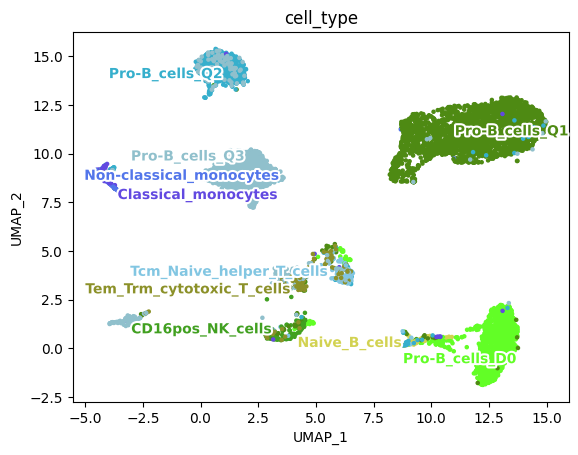

In [22]:
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['cell_type'],
    target='cell',
    text_size=10,
    dot_size=5)

In [23]:
cistopic_obj.cell_data['is_nan'] = cistopic_obj.cell_data['cell_type'].isna()
cistopic_obj.cell_data['is_nan'].value_counts()

False    7522
True     2746
Name: is_nan, dtype: int64

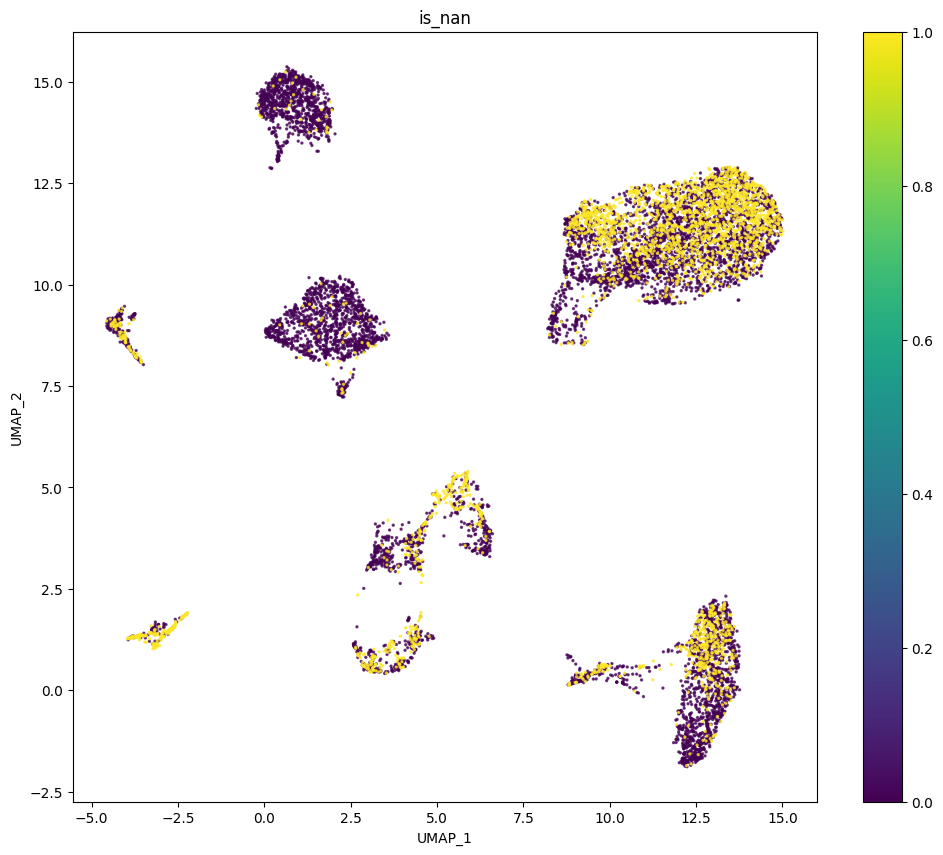

In [24]:
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['is_nan'],
    remove_nan = False,
    show_label = False,
    target='cell',
    text_size=10,
    dot_size=2,
    alpha = 0.7,
    figsize = (12,10))



# Impute missing cell type labels

Some cells do not have RNA counterpart and hence no cell type annotation. I use KNN = 5 on UMAP projection to impute the missing cell types. 

In [25]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

label = 'cell_type_all'

# Extract UMAP coordinates and cell type labels
cistopic_obj.cell_data[label] = cistopic_obj.cell_data['cell_type'].copy()
umap_coords = cistopic_obj.projections['cell']['UMAP']
cell_types = cistopic_obj.cell_data[label]  


missing_mask = cell_types.isna()

# split
X_labeled = umap_coords[~missing_mask]
y_labeled = cell_types[~missing_mask]
X_unlabeled = umap_coords[missing_mask]

#  KNN classifier on labeled data
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_labeled, y_labeled)


imputed_labels = knn.predict(X_unlabeled) # predict


cistopic_obj.cell_data.loc[missing_mask, label] = imputed_labels

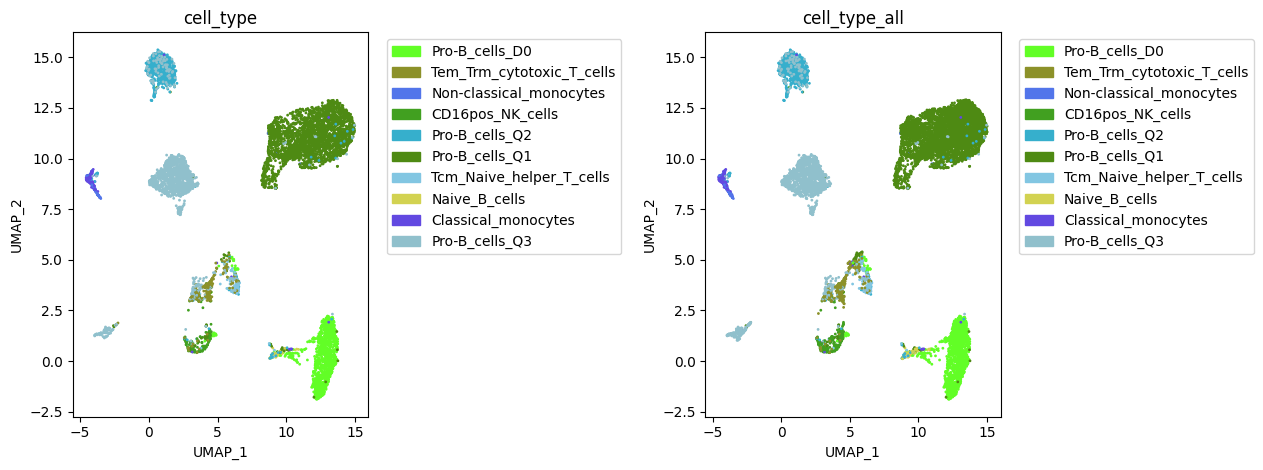

In [26]:
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['cell_type','cell_type_all'],
    target='cell', num_columns=2,
    text_size=3,
    show_label = False,
    show_legend= True,
    dot_size=1)

In [27]:
cistopic_obj.cell_data.cell_type.value_counts()

Pro-B_cells_Q1               2894
Pro-B_cells_Q3               1527
Pro-B_cells_D0               1284
Pro-B_cells_Q2                963
Tem_Trm_cytotoxic_T_cells     212
CD16pos_NK_cells              195
Tcm_Naive_helper_T_cells      165
Classical_monocytes           141
Naive_B_cells                  88
Non-classical_monocytes        53
Name: cell_type, dtype: int64

In [28]:
cistopic_obj.cell_data.cell_type_all.value_counts()

Pro-B_cells_Q1               4652
Pro-B_cells_Q3               1734
Pro-B_cells_D0               1666
Pro-B_cells_Q2                991
CD16pos_NK_cells              317
Tem_Trm_cytotoxic_T_cells     297
Tcm_Naive_helper_T_cells      215
Classical_monocytes           190
Naive_B_cells                 134
Non-classical_monocytes        72
Name: cell_type_all, dtype: int64

In [29]:
subset = cistopic_obj.cell_data[cistopic_obj.cell_data['cell_type'].isna()]  # check the predicted cell types
subset

barcode_rank  fraction_of_fragments_in_peaks  \
TTTGGTTAGATATTGG-D0___D0           373                        0.661026   
TTGTTGAGTTTCTCAT-D0___D0          1184                        0.715638   
TACTTCCTCGTGATGG-D0___D0          2381                        0.657471   
CTAATGAAGCAAGACT-D0___D0          2313                        0.655650   
CTAGGATAGCAGGTAT-D0___D0          2090                        0.602930   
...                                ...                             ...   
GTGGACCAGGGTGGGA-Q3___Q3          2461                        0.639742   
GTACCGGCATTTCATG-Q3___Q3          2151                        0.512776   
GAAGGCCTCAACCGGA-Q3___Q3          1888                        0.394248   
GGCTTTGGTAGAGGGA-Q3___Q3          2011                        0.641942   
CGTAAAGGTTCACCTC-Q3___Q3          2044                        0.389229   

                         cisTopic_nr_acc  log10_unique_fragments_count  \
TTTGGTTAGATATTGG-D0___D0           14566                      4.406063   
TTGTTGAGTTTCTCAT-D0___D0            5014                      3.875177   
TACTTCCTCGTGATGG-D0___D0            1184                      3.240799   
CTAATGAAGCAAGACT-D0___D0            1210                      3.273464   
CTAGGATAGCAGGTAT-D0___D0            1631                      3.402605   
...                                  ...                           ...   
GTGGACCAGGGTGGGA-Q3___Q3            1178                      3.269046   
GTACCGGCATTTCATG-Q3___Q3            1360                      3.461948   
GAAGGCCTCAACCGGA-Q3___Q3            1334                      3.582745   
GGCTTTGGTAGAGGGA-Q3___Q3            2071                      3.526081   
CGTAAAGGTTCACCTC-Q3___Q3            1207                      3.514415   

                          duplication_count  tss_enrichment  \
TTTGGTTAGATATTGG-D0___D0               7046       16.426525   
TTGTTGAGTTTCTCAT-D0___D0               2131       20.624365   
TACTTCCTCGTGATGG-D0___D0                476       18.231092   
CTAATGAAGCAAGACT-D0___D0                507       29.663260   
CTAGGATAGCAGGTAT-D0___D0                 64       15.316235   
...                                     ...             ...   
GTGGACCAGGGTGGGA-Q3___Q3                809       16.276479   
GTACCGGCATTTCATG-Q3___Q3               1415       12.733937   
GAAGGCCTCAACCGGA-Q3___Q3               1812       11.775908   
GGCTTTGGTAGAGGGA-Q3___Q3               1628       17.478549   
CGTAAAGGTTCACCTC-Q3___Q3               1533       15.601633   

                         cisTopic_log_nr_acc  \
TTTGGTTAGATATTGG-D0___D0             4.16334   
TTGTTGAGTTTCTCAT-D0___D0            3.700184   
TACTTCCTCGTGATGG-D0___D0            3.073352   
CTAATGAAGCAAGACT-D0___D0            3.082785   
CTAGGATAGCAGGTAT-D0___D0            3.212454   
...                                      ...   
GTGGACCAGGGTGGGA-Q3___Q3            3.071145   
GTACCGGCATTTCATG-Q3___Q3            3.133539   
GAAGGCCTCAACCGGA-Q3___Q3            3.125156   
GGCTTTGGTAGAGGGA-Q3___Q3             3.31618   
CGTAAAGGTTCACCTC-Q3___Q3            3.081707   

                          pdf_values_for_duplication_ratio cisTopic_nr_frag  \
TTTGGTTAGATATTGG-D0___D0                          2.897098            18173   
TTGTTGAGTTTCTCAT-D0___D0                         19.061220             5770   
TACTTCCTCGTGATGG-D0___D0                         10.601640             1248   
CTAATGAAGCAAGACT-D0___D0                          9.632363             1320   
CTAGGATAGCAGGTAT-D0___D0                          0.044934             1661   
...                                                    ...              ...   
GTGGACCAGGGTGGGA-Q3___Q3                         10.747423             1304   
GTACCGGCATTTCATG-Q3___Q3                          9.235421             1605   
GAAGGCCTCAACCGGA-Q3___Q3                         16.301478             1607   
GGCTTTGGTAGAGGGA-Q3___Q3                         17.510220             2348   
CGTAAAGGTTCACCTC-Q3___Q3                     

In [30]:
subset.cell_type_all.value_counts()

Pro-B_cells_Q1               1758
Pro-B_cells_D0                382
Pro-B_cells_Q3                207
CD16pos_NK_cells              122
Tem_Trm_cytotoxic_T_cells      85
Tcm_Naive_helper_T_cells       50
Classical_monocytes            49
Naive_B_cells                  46
Pro-B_cells_Q2                 28
Non-classical_monocytes        19
Name: cell_type_all, dtype: int64

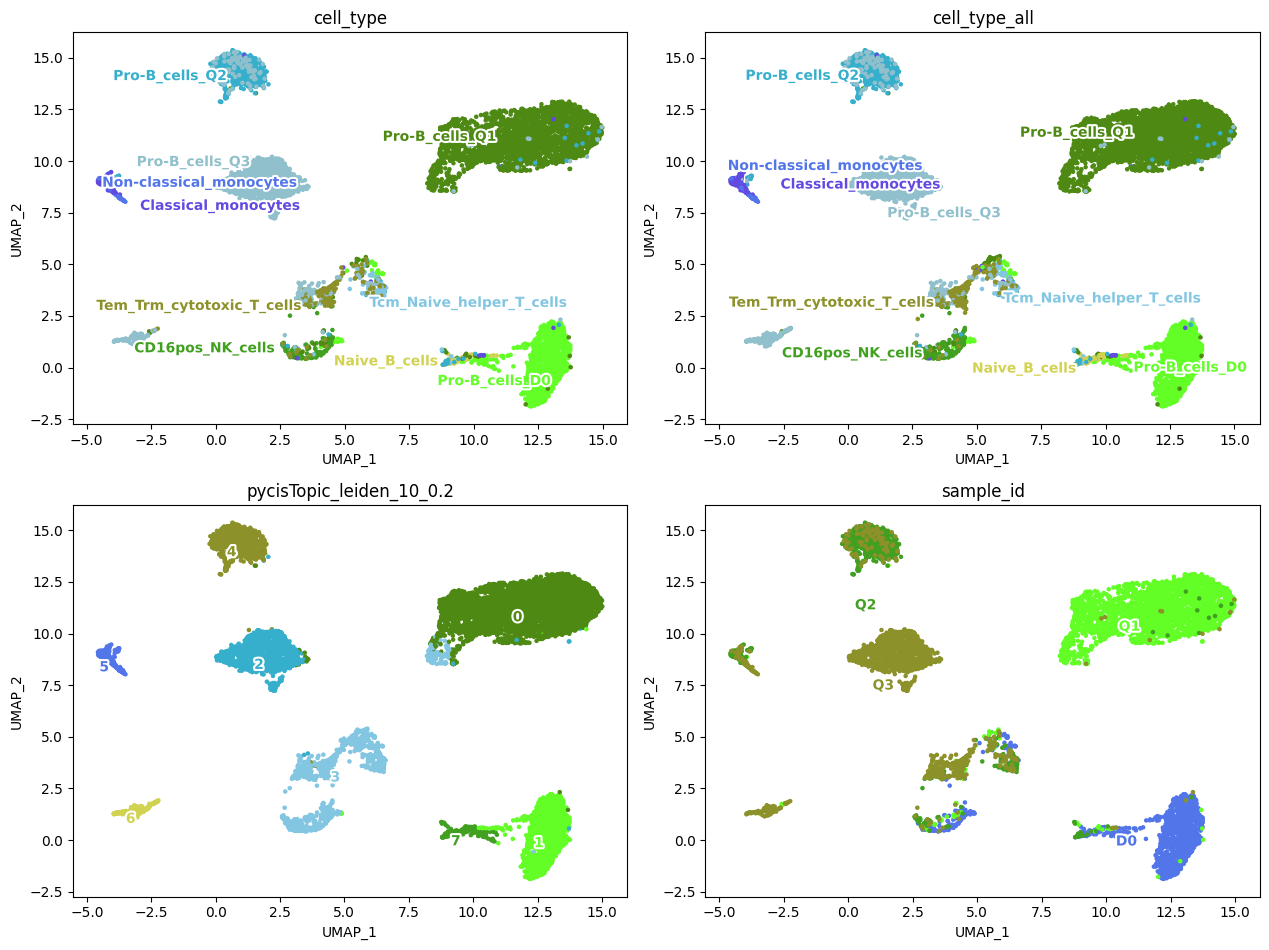

In [31]:
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['cell_type','cell_type_all','pycisTopic_leiden_10_0.2','sample_id'],
    target='cell', num_columns=2,
    text_size=10,
    dot_size=5)

In [32]:
cistopic_obj.cell_data['sample_id'].isna().sum()

2746

In [33]:
cistopic_obj.cell_data['cell_type'].isna().sum() # there is  2746 cells that do not annotation from RNA
# either because they have no RNA counterpart, OR because given cell type is not common and was droppped in preprocessing
# to avoid issues with peak calling with very few cells

2746

In [34]:
cistopic_obj.cell_data

barcode_rank  fraction_of_fragments_in_peaks  \
GTCTAGCTCCAGGATG-D0___D0          1403                        0.696985   
CACGGTTTCGTTAGTT-D0___D0          1118                        0.681807   
AAGTGAACATTGTGAG-D0___D0          1130                        0.720803   
AAAGGGATCGTCCTAA-D0___D0          1559                        0.714344   
ACAGCACCAAAGGTAA-D0___D0           930                        0.691150   
...                                ...                             ...   
GGAAGTAAGGTGGGAG-Q3___Q3          2361                        0.717342   
GCATTACGTAAGTGGC-Q3___Q3          2370                        0.478161   
GAGGGTGAGGTATGGT-Q3___Q3          2478                        0.680068   
TGGACCAAGGTTGTAA-Q3___Q3          2350                        0.728623   
CGGCTAGCATCCTAGT-Q3___Q3          2349                        0.595860   

                         cisTopic_nr_acc  log10_unique_fragments_count  \
GTCTAGCTCCAGGATG-D0___D0            3833                      3.763877   
CACGGTTTCGTTAGTT-D0___D0            5172                      3.910998   
AAGTGAACATTGTGAG-D0___D0            5523                      3.904391   
AAAGGGATCGTCCTAA-D0___D0            3373                      3.687886   
ACAGCACCAAAGGTAA-D0___D0            7075                      4.039850   
...                                  ...                           ...   
GGAAGTAAGGTGGGAG-Q3___Q3            1539                      3.342028   
GCATTACGTAAGTGGC-Q3___Q3             980                      3.337659   
GAGGGTGAGGTATGGT-Q3___Q3            1203                      3.247237   
TGGACCAAGGTTGTAA-Q3___Q3            1583                      3.346939   
CGGCTAGCATCCTAGT-Q3___Q3            1336                      3.346939   

                          duplication_count  tss_enrichment  \
GTCTAGCTCCAGGATG-D0___D0               1749       20.061720   
CACGGTTTCGTTAGTT-D0___D0               2353       18.499067   
AAGTGAACATTGTGAG-D0___D0               2315       17.083343   
AAAGGGATCGTCCTAA-D0___D0               1488       26.667670   
ACAGCACCAAAGGTAA-D0___D0               3157       16.882171   
...                                     ...             ...   
GGAAGTAAGGTGGGAG-Q3___Q3               1071       13.521482   
GCATTACGTAAGTGGC-Q3___Q3                905       13.003755   
GAGGGTGAGGTATGGT-Q3___Q3                877       15.620820   
TGGACCAAGGTTGTAA-Q3___Q3               1046       18.044076   
CGGCTAGCATCCTAGT-Q3___Q3                957       11.784702   

                         cisTopic_log_nr_acc  \
GTCTAGCTCCAGGATG-D0___D0            3.583539   
CACGGTTTCGTTAGTT-D0___D0            3.713659   
AAGTGAACATTGTGAG-D0___D0            3.742175   
AAAGGGATCGTCCTAA-D0___D0            3.528016   
ACAGCACCAAAGGTAA-D0___D0            3.849726   
...                                      ...   
GGAAGTAAGGTGGGAG-Q3___Q3            3.187239   
GCATTACGTAAGTGGC-Q3___Q3            2.991226   
GAGGGTGAGGTATGGT-Q3___Q3            3.080266   
TGGACCAAGGTTGTAA-Q3___Q3            3.199481   
CGGCTAGCATCCTAGT-Q3___Q3            3.125806   

                          pdf_values_for_duplication_ratio cisTopic_nr_frag  \
GTCTAGCTCCAGGATG-D0___D0                         13.634188             4309   
CACGGTTTCGTTAGTT-D0___D0                         21.064461             5971   
AAGTGAACATTGTGAG-D0___D0                         20.992568             6296   
AAAGGGATCGTCCTAA-D0___D0                          9.928649             3763   
ACAGCACCAAAGGTAA-D0___D0                         20.009237             8168   
...                                                    ...              ...   
GGAAGTAAGGTGGGAG-Q3___Q3                         10.617857             1728   
GCATTACGTAAGTGGC-Q3___Q3                          4.243089             1123   
GAGGGTGAGGTATGGT-Q3___Q3                          3.498081             1309   
TGGACCAAGGTTGTAA-Q3___Q3                         19.379643             1755   
CGGCTAGCATCCTAGT-Q3___Q3                     

In [35]:
# remove NAs in sample_id
cistopic_obj.cell_data['sample_id'] = cistopic_obj.cell_data['sample_id'].fillna(cistopic_obj.cell_data.index.to_series().apply(lambda x: x.split('__')[-1]))
cistopic_obj.cell_data['sample_id'] = cistopic_obj.cell_data['sample_id'].str.replace('_','')
cistopic_obj.cell_data['sample_id'].isna().sum()

0

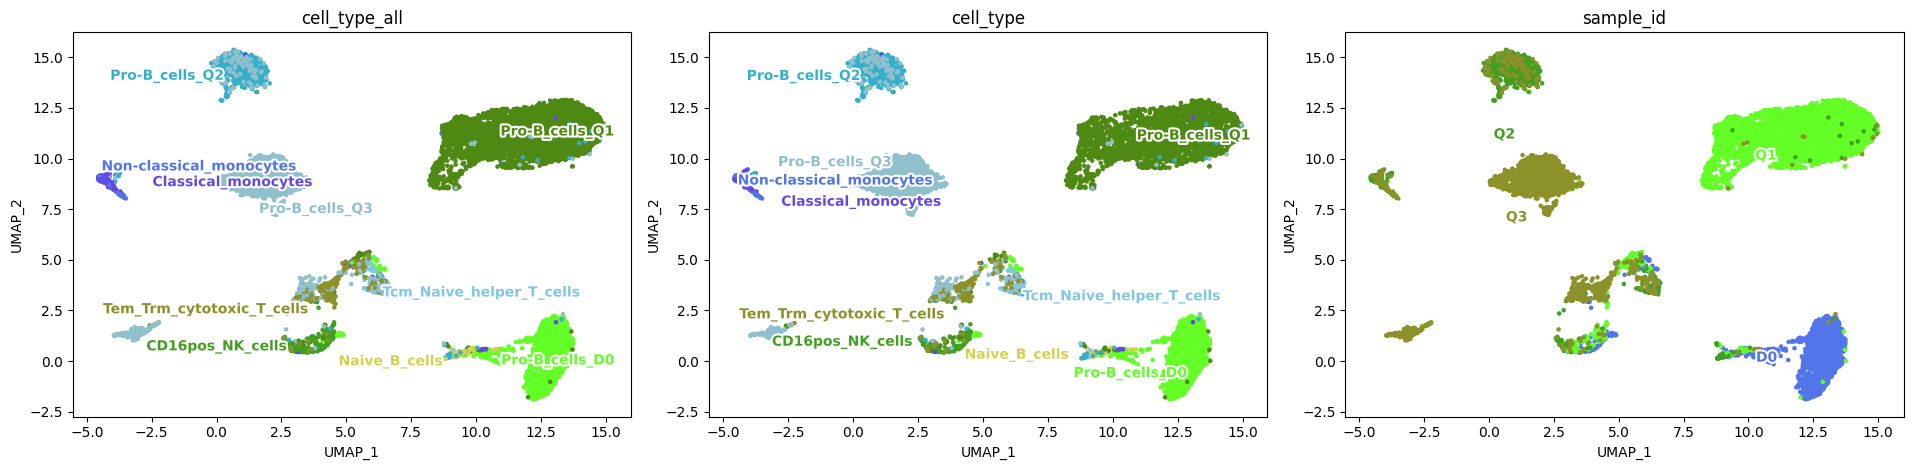

In [36]:
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['cell_type_all','cell_type', 'sample_id'],
    target='cell', num_columns=4,
    text_size=10,
    dot_size=5)

In [37]:
cistopic_obj.cell_data.tss_enrichment.max()

51.88680752957533

In [38]:
cistopic_obj.cell_data.tss_enrichment.min()

10.0024834015134

In [39]:
cistopic_obj.cell_data.tss_enrichment.median()

15.694712425076927

In [40]:
cistopic_obj.cell_data.fraction_of_fragments_in_peaks.median()

0.6631182313653703

In [41]:
cistopic_obj.cell_data.log10_unique_fragments_count.median()

3.724603507677961

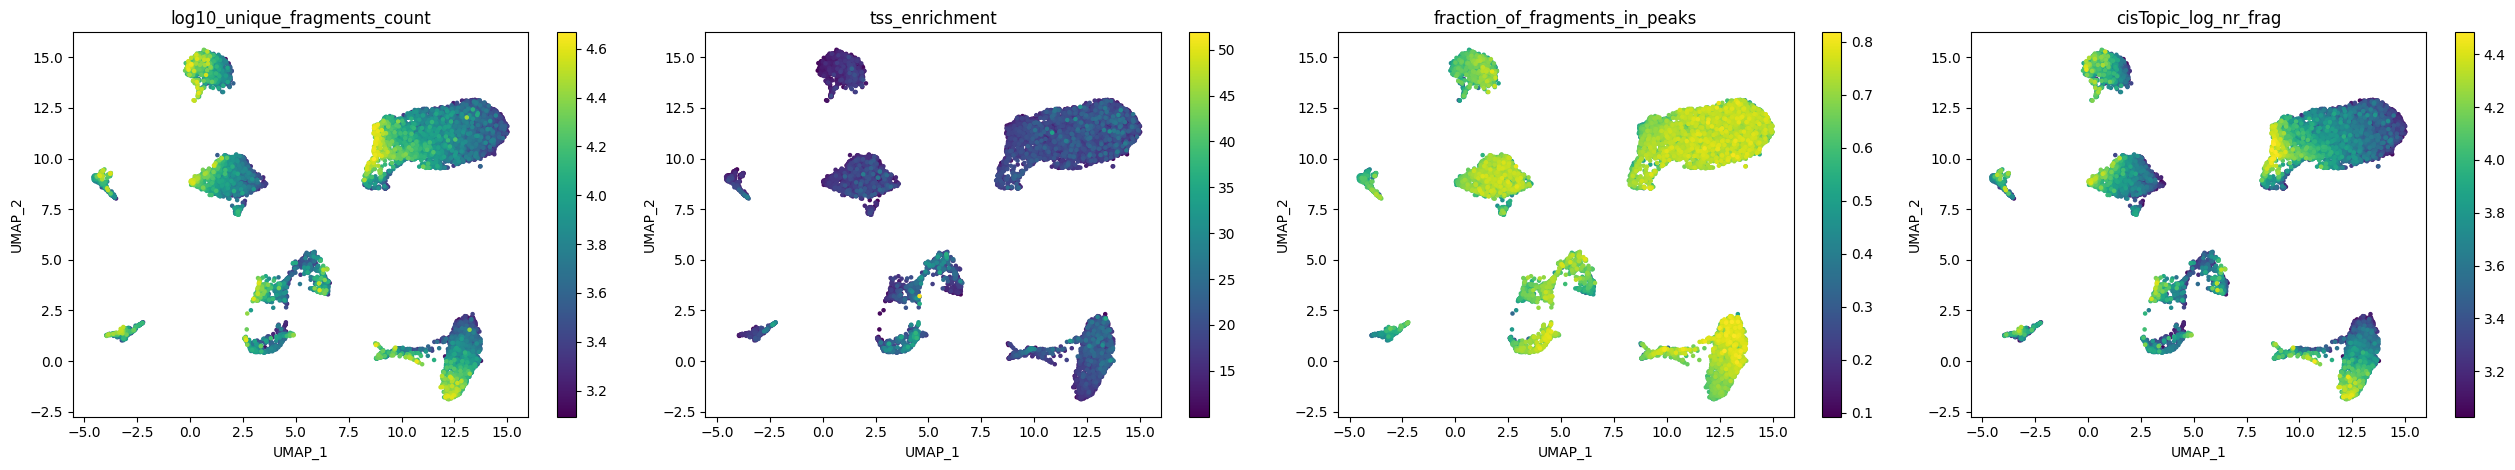

In [42]:
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['log10_unique_fragments_count', 'tss_enrichment', 'fraction_of_fragments_in_peaks', 'cisTopic_log_nr_frag'],
    target='cell', num_columns=4,
    text_size=10,
    dot_size=5)

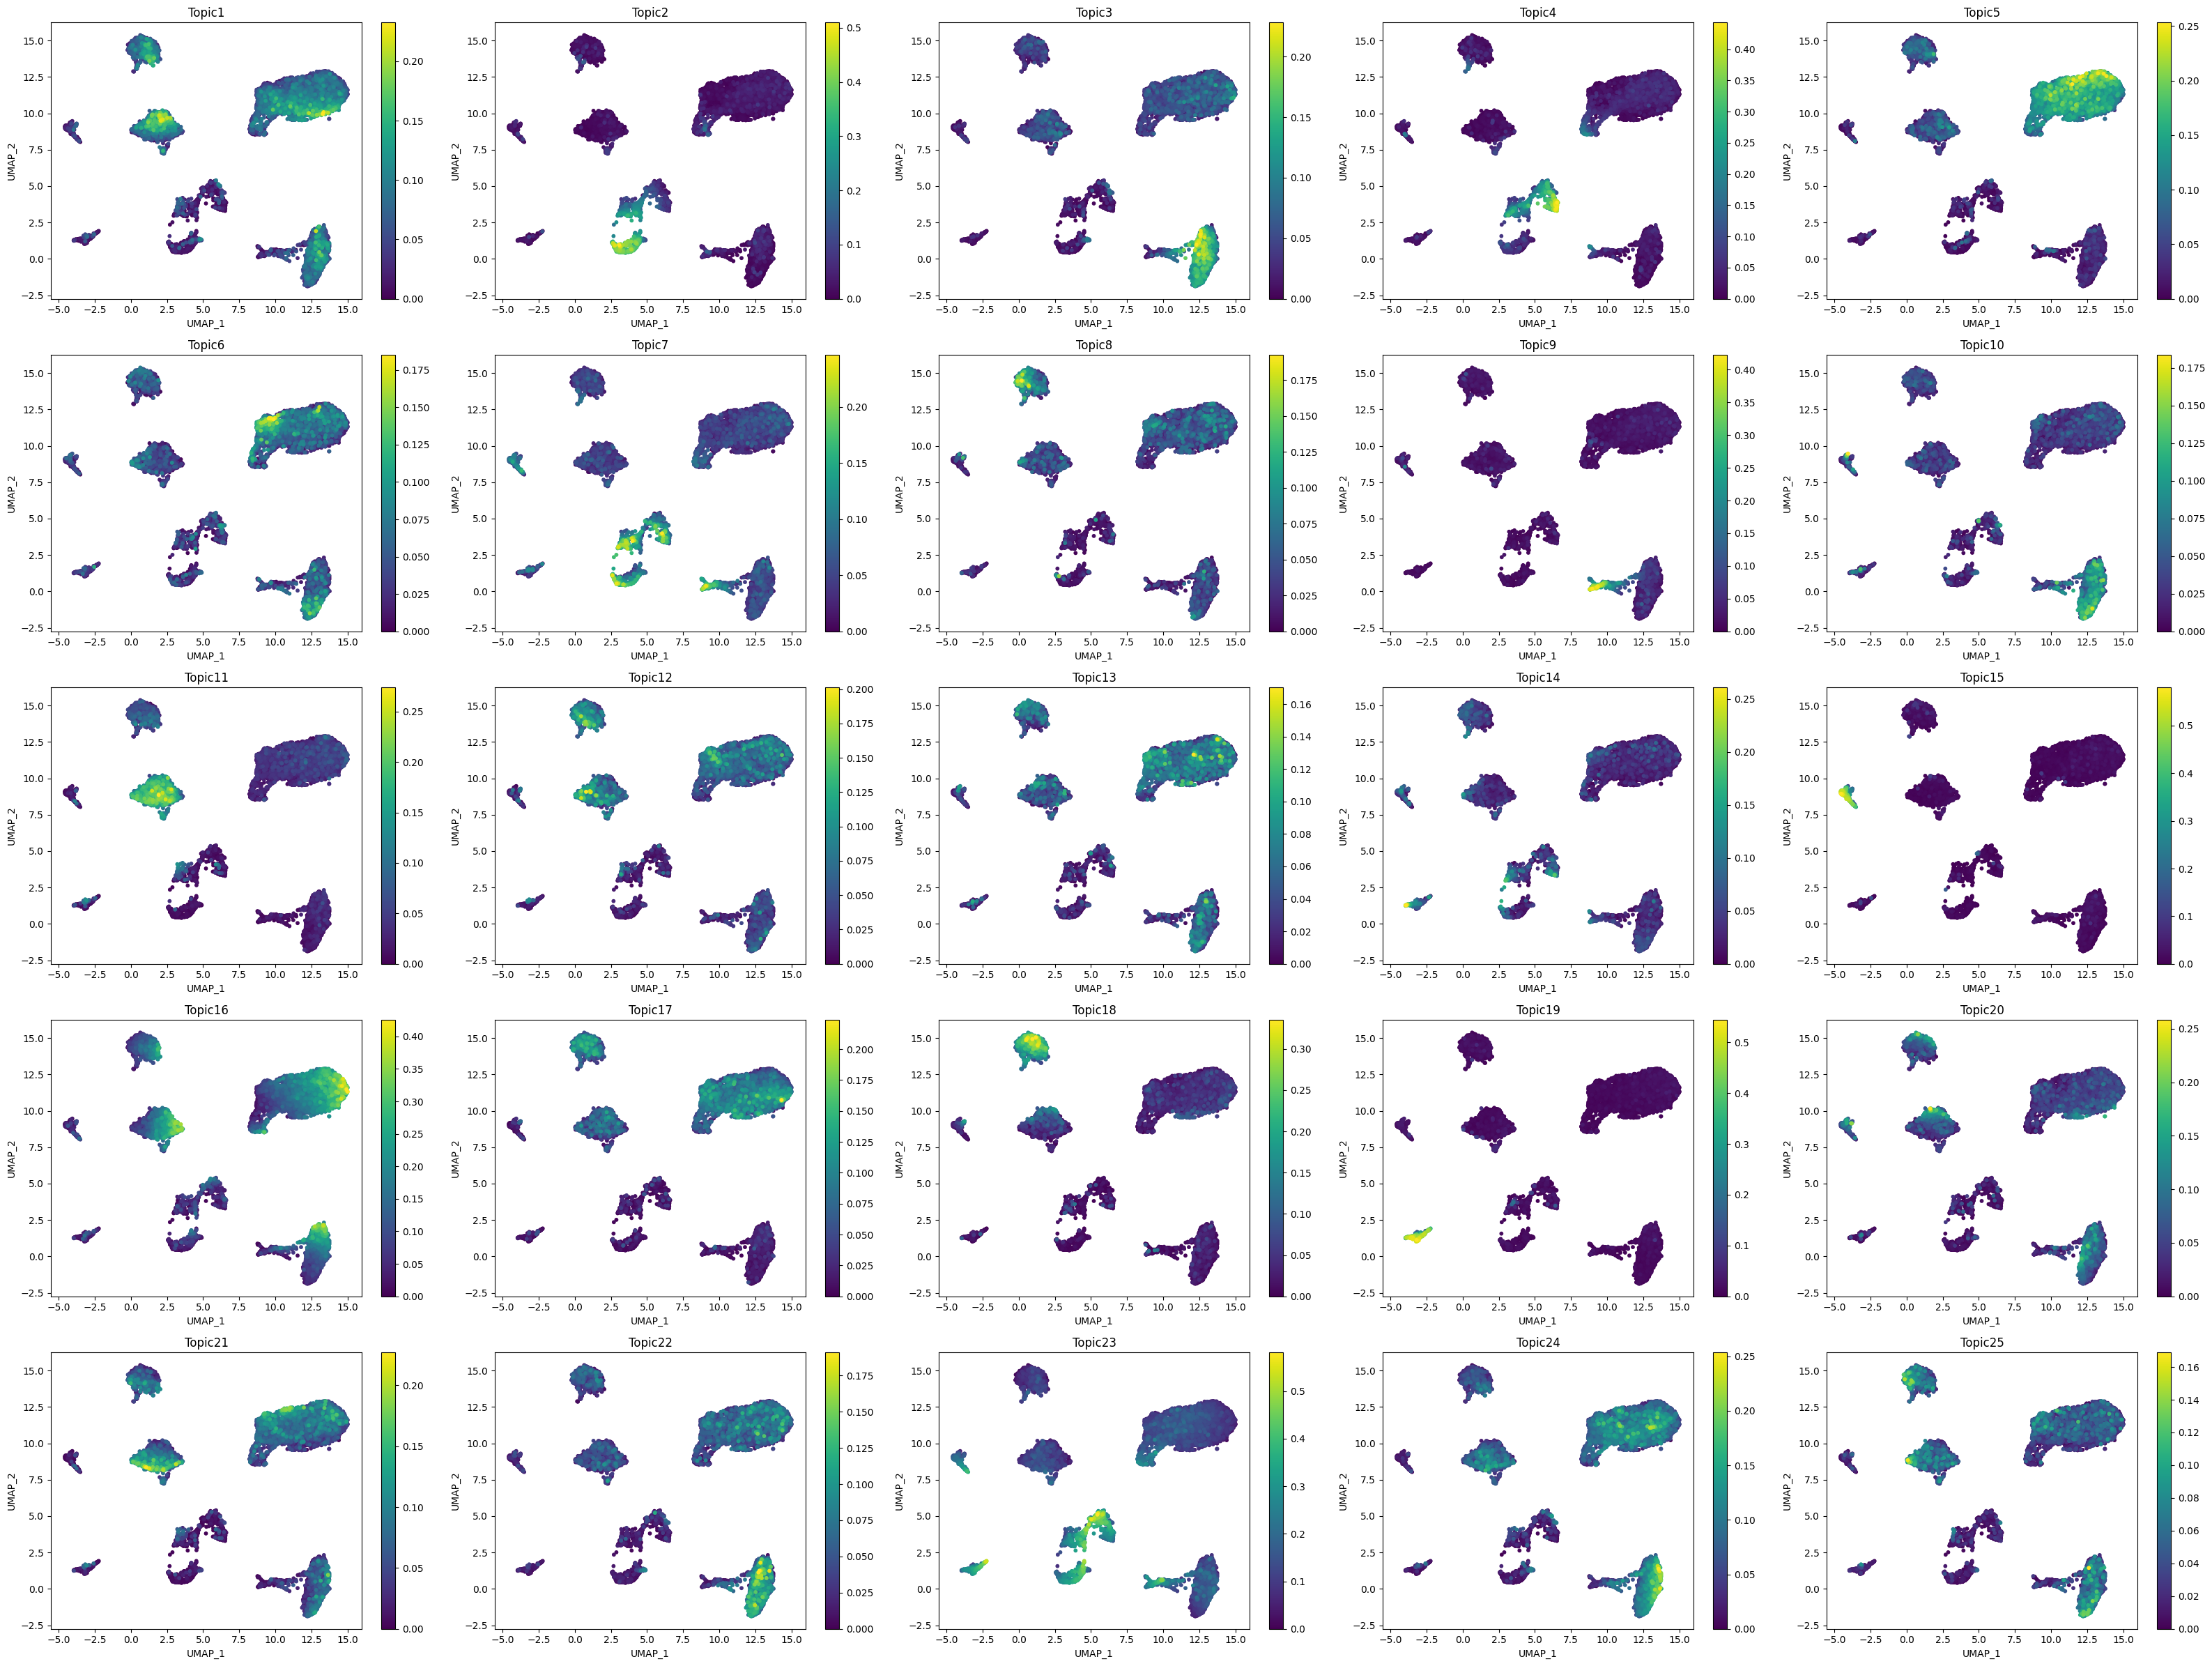

In [43]:
# cell topic contributions- 
plot_topic(
    cistopic_obj,
    reduction_name = 'UMAP',
    target = 'cell',
    num_columns=5
)

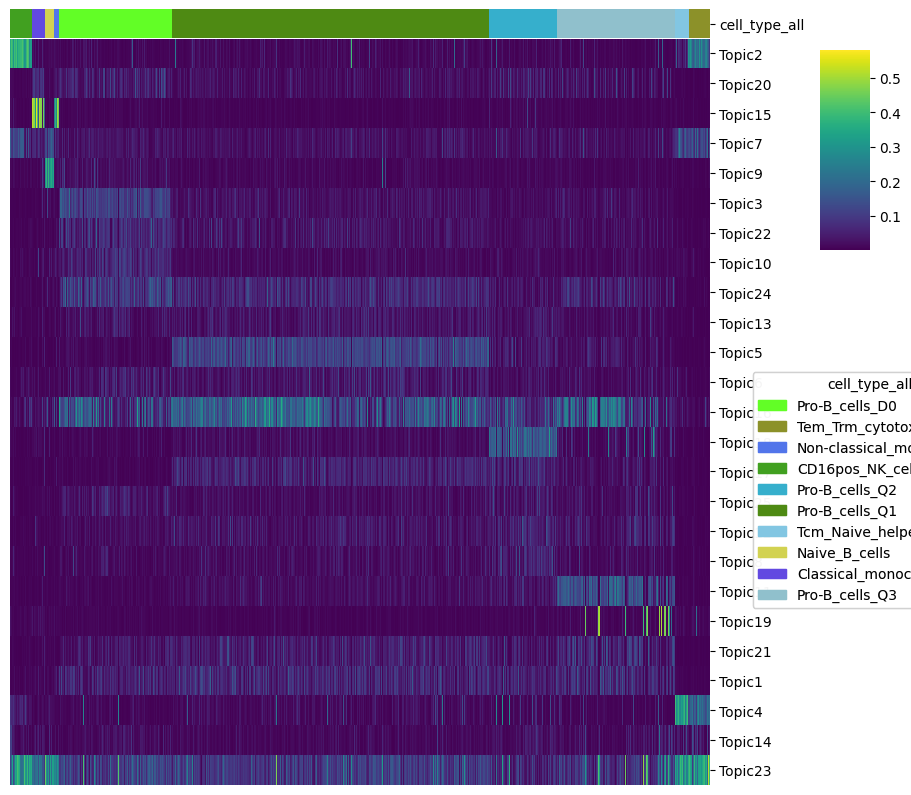

In [44]:
cell_topic_heatmap(
    cistopic_obj,
    variables = ['cell_type_all'],
    scale = False,
    legend_loc_x = 1.0,
    legend_loc_y = -1.2,
    legend_dist_y = -1,
    figsize = (10, 10)
)

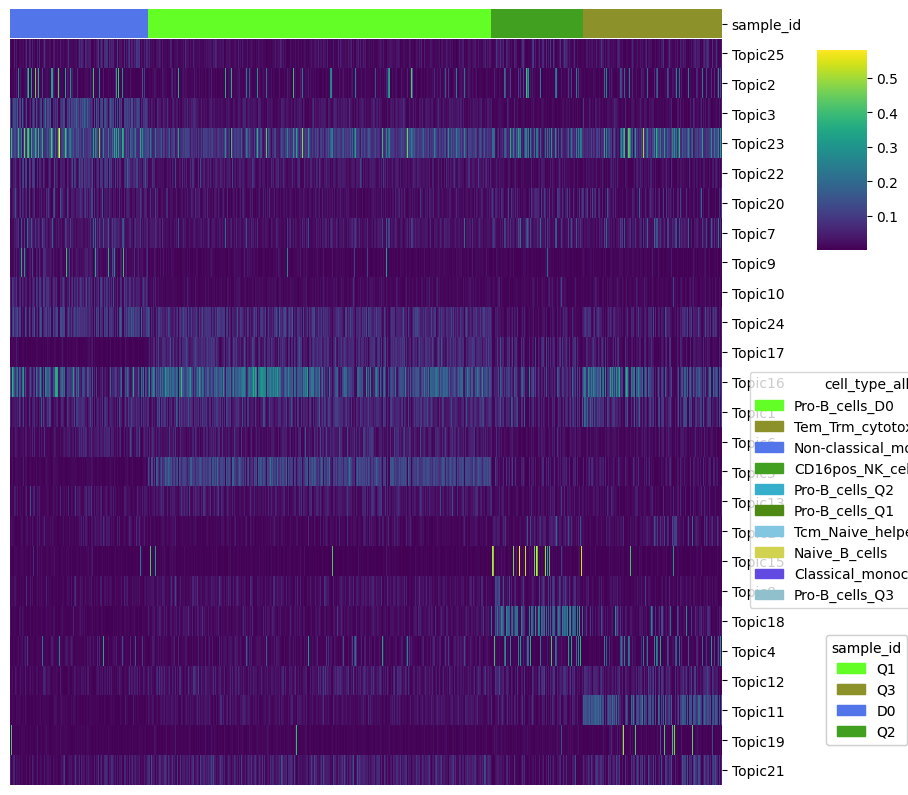

In [45]:
cell_topic_heatmap(
    cistopic_obj,
    variables = ['sample_id'],
    scale = False,
    legend_loc_x = 1.0,
    legend_loc_y = -1.2,
    legend_dist_y = -1,
    figsize = (10, 10)
)

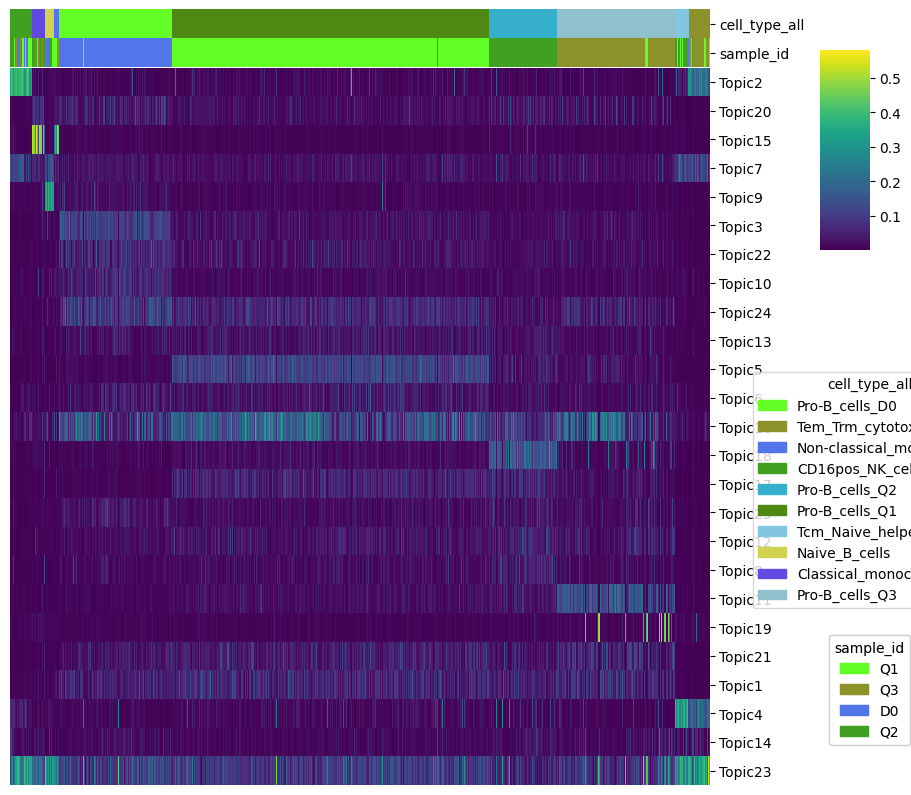

In [46]:
cell_topic_heatmap(
    cistopic_obj,
    variables = ['cell_type_all','sample_id'],
    scale = False,
    legend_loc_x = 1.0,
    legend_loc_y = -1.2,
    legend_dist_y = -1,
    figsize = (10, 10)
)

# Topic binarization

In [47]:
from pycisTopic.topic_binarization import binarize_topics

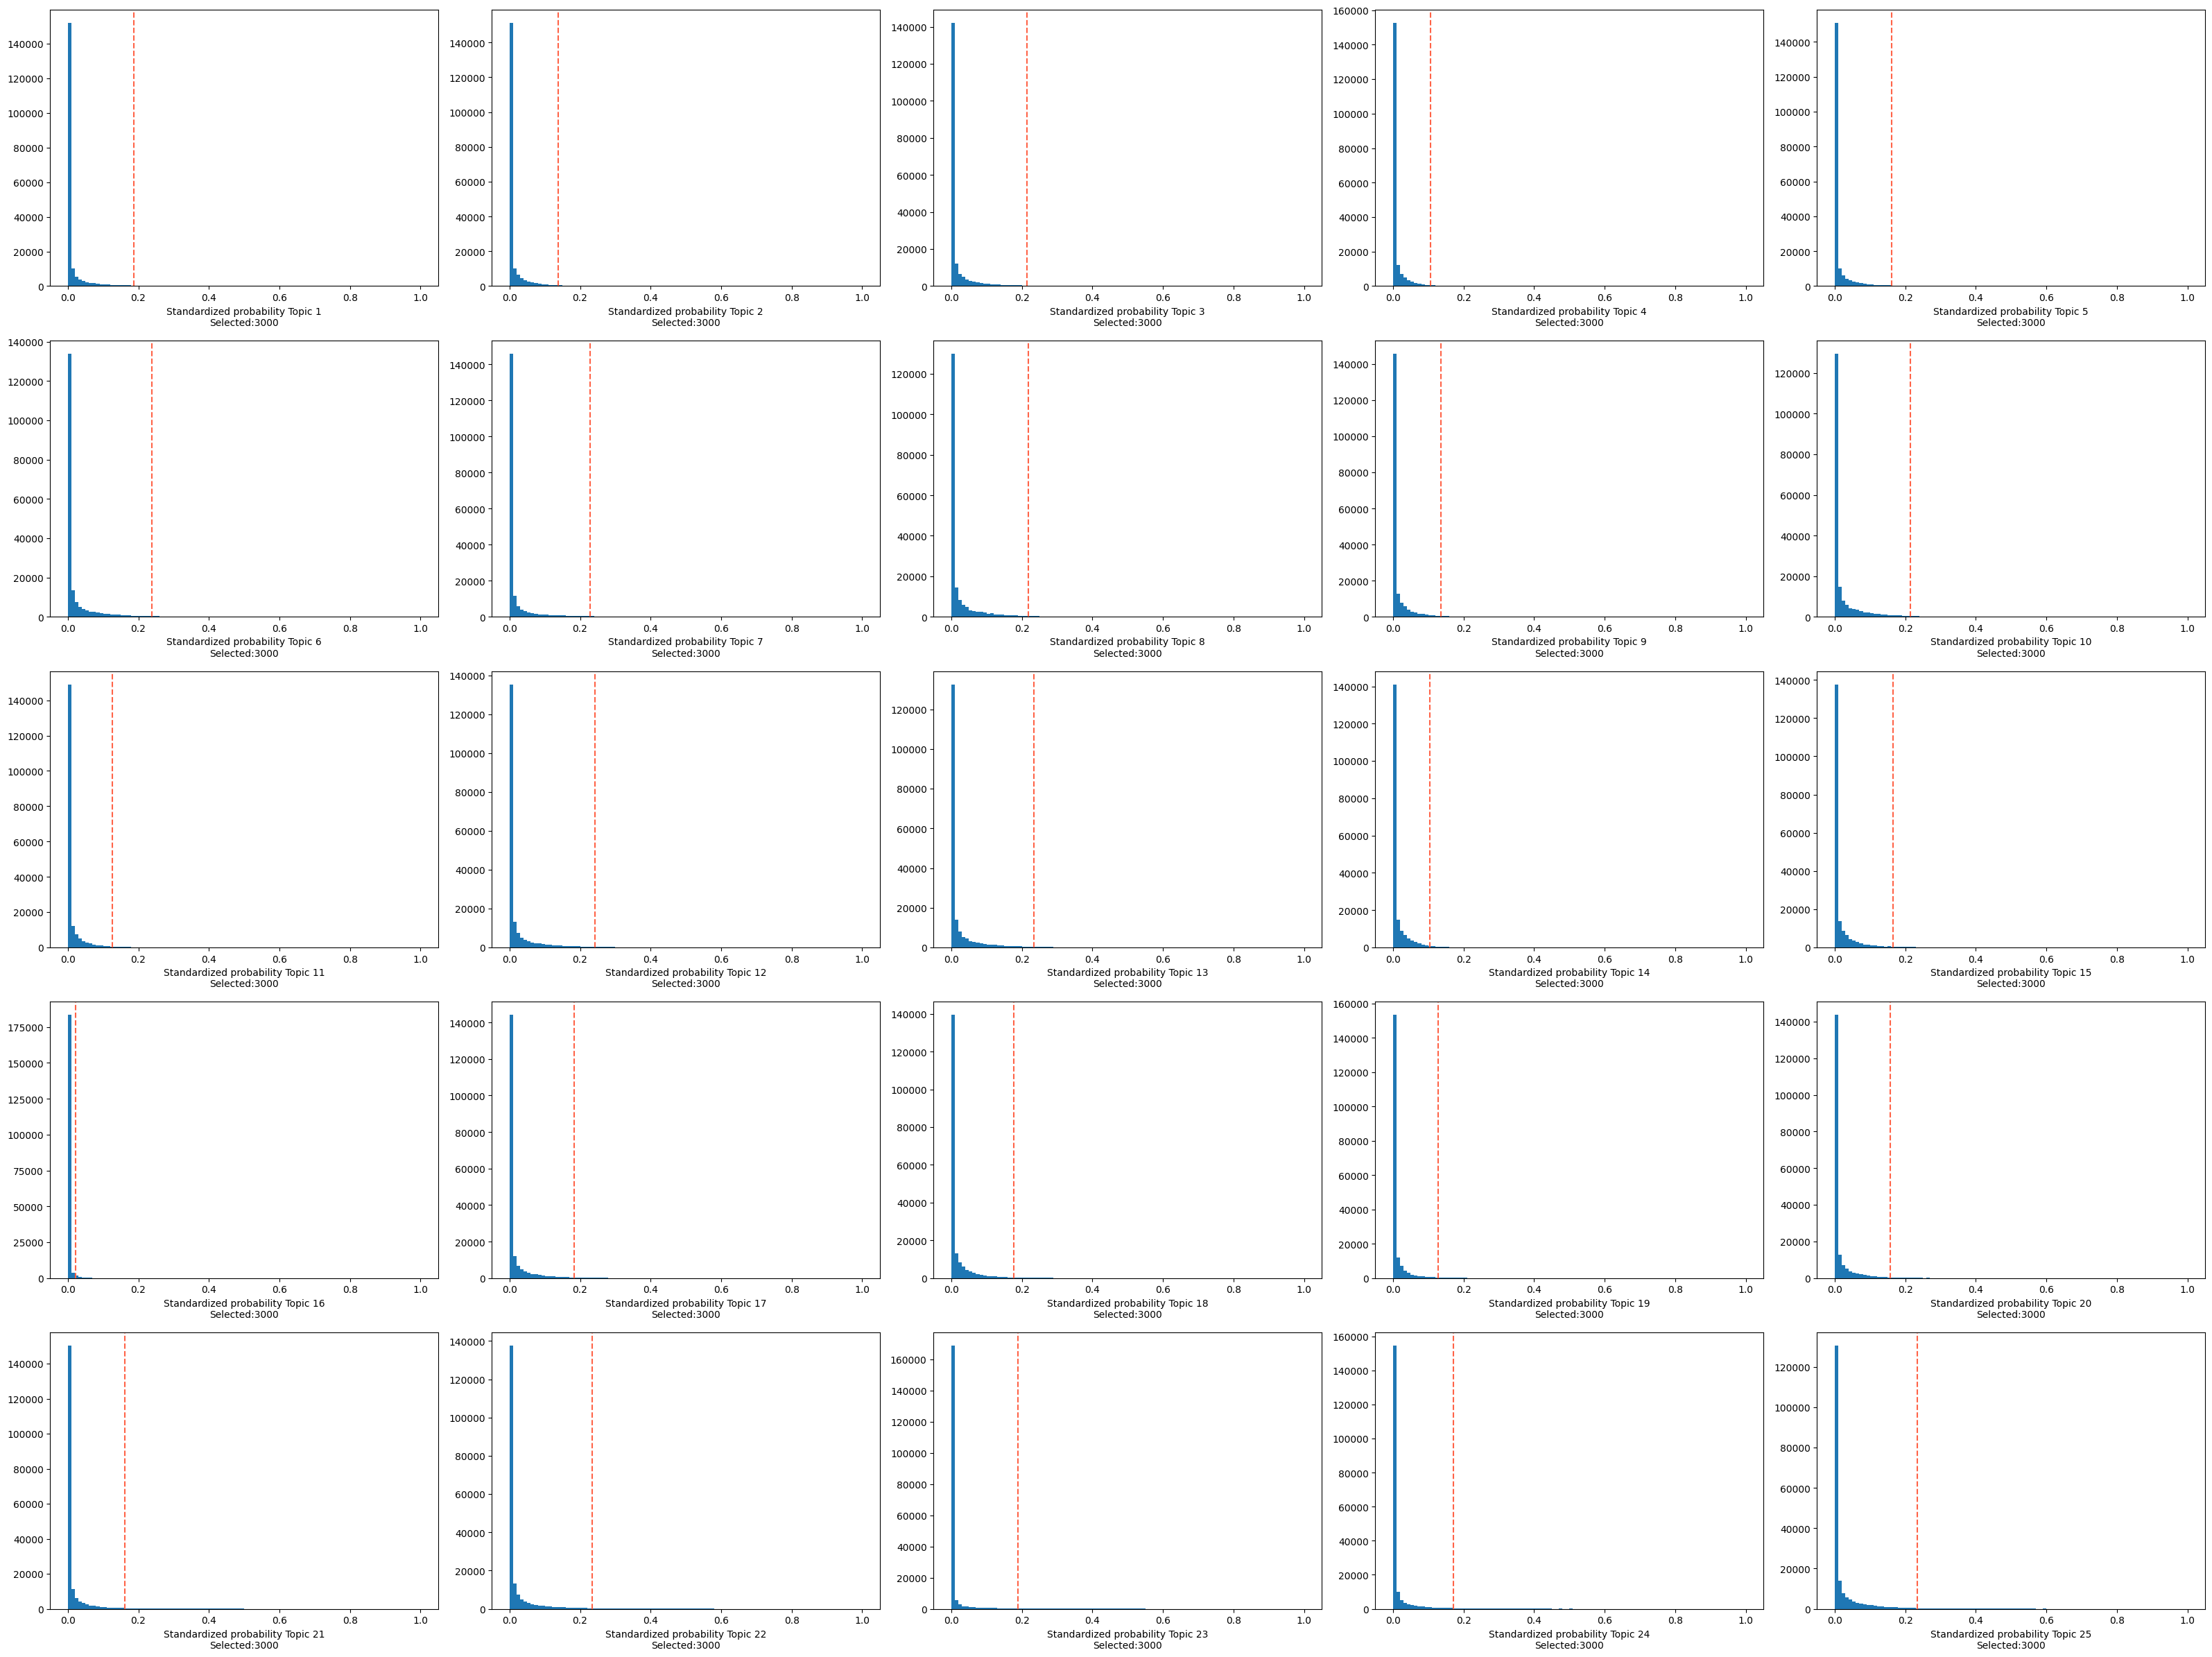

In [48]:
region_bin_topics_top_3k = binarize_topics(
    cistopic_obj, method='ntop', ntop = 3_000,
    plot=True, num_columns=5
)

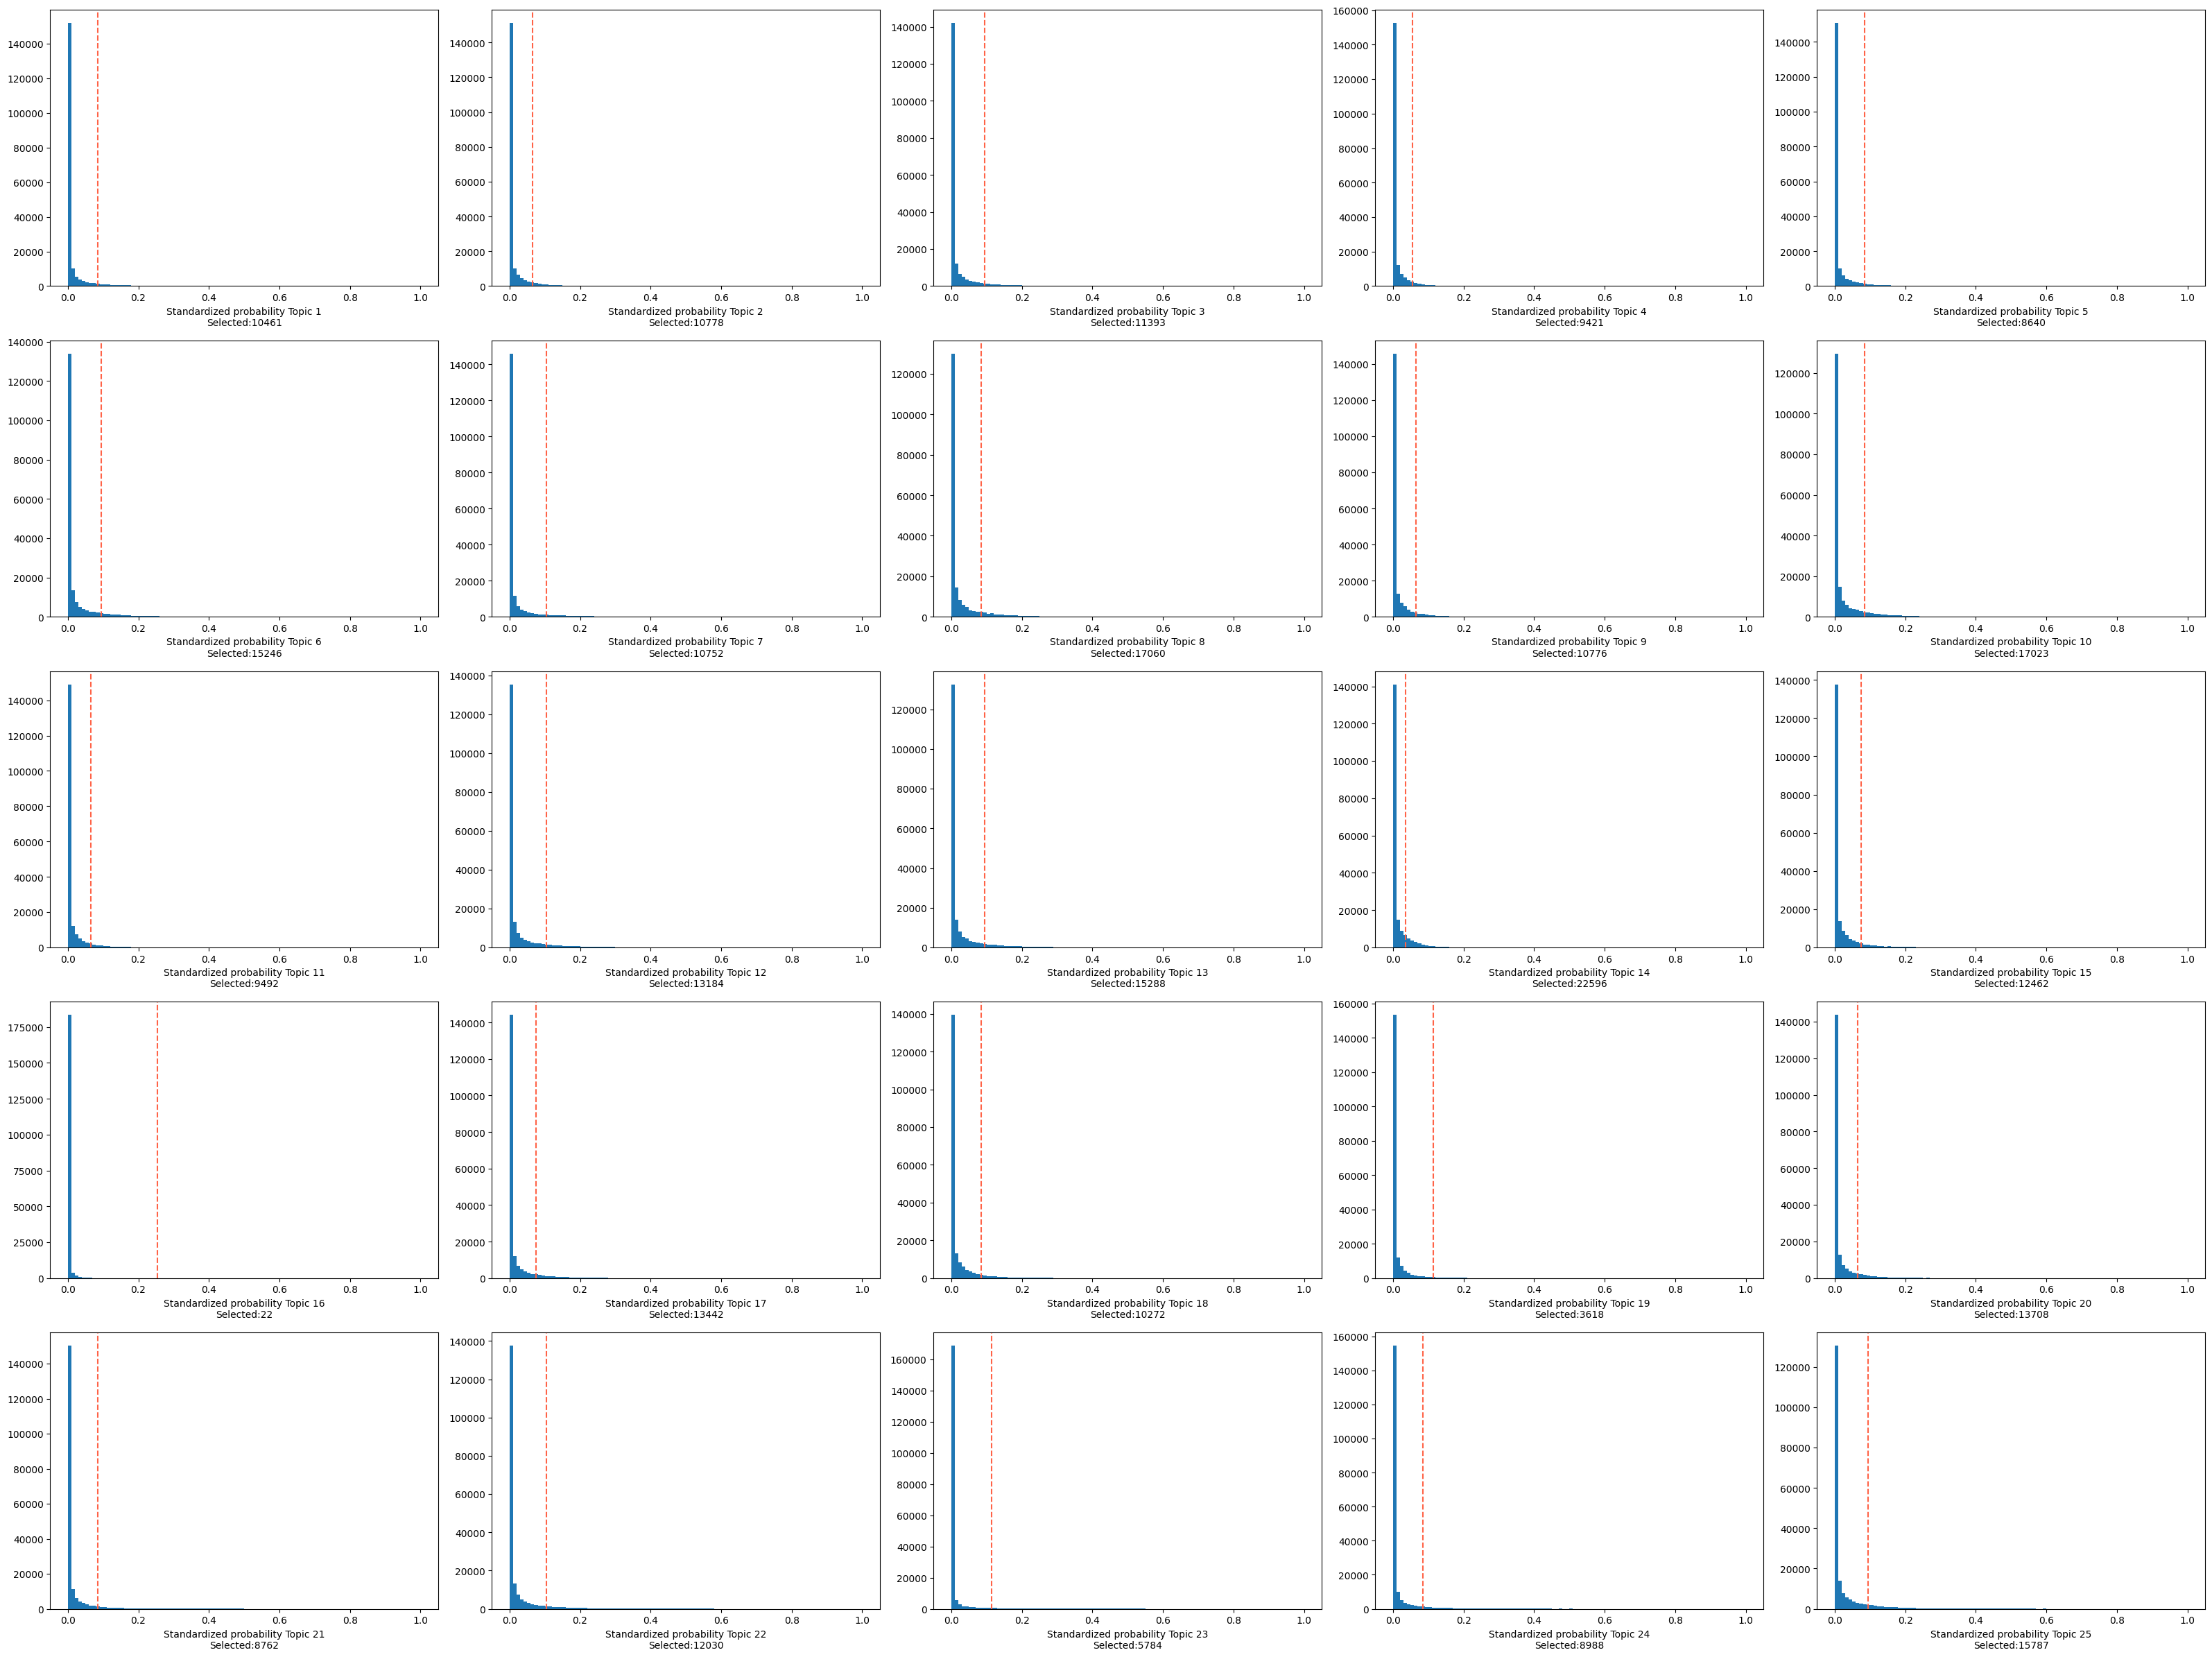

In [49]:
region_bin_topics_otsu = binarize_topics(
    cistopic_obj, method='otsu',
    plot=True, num_columns=5
)

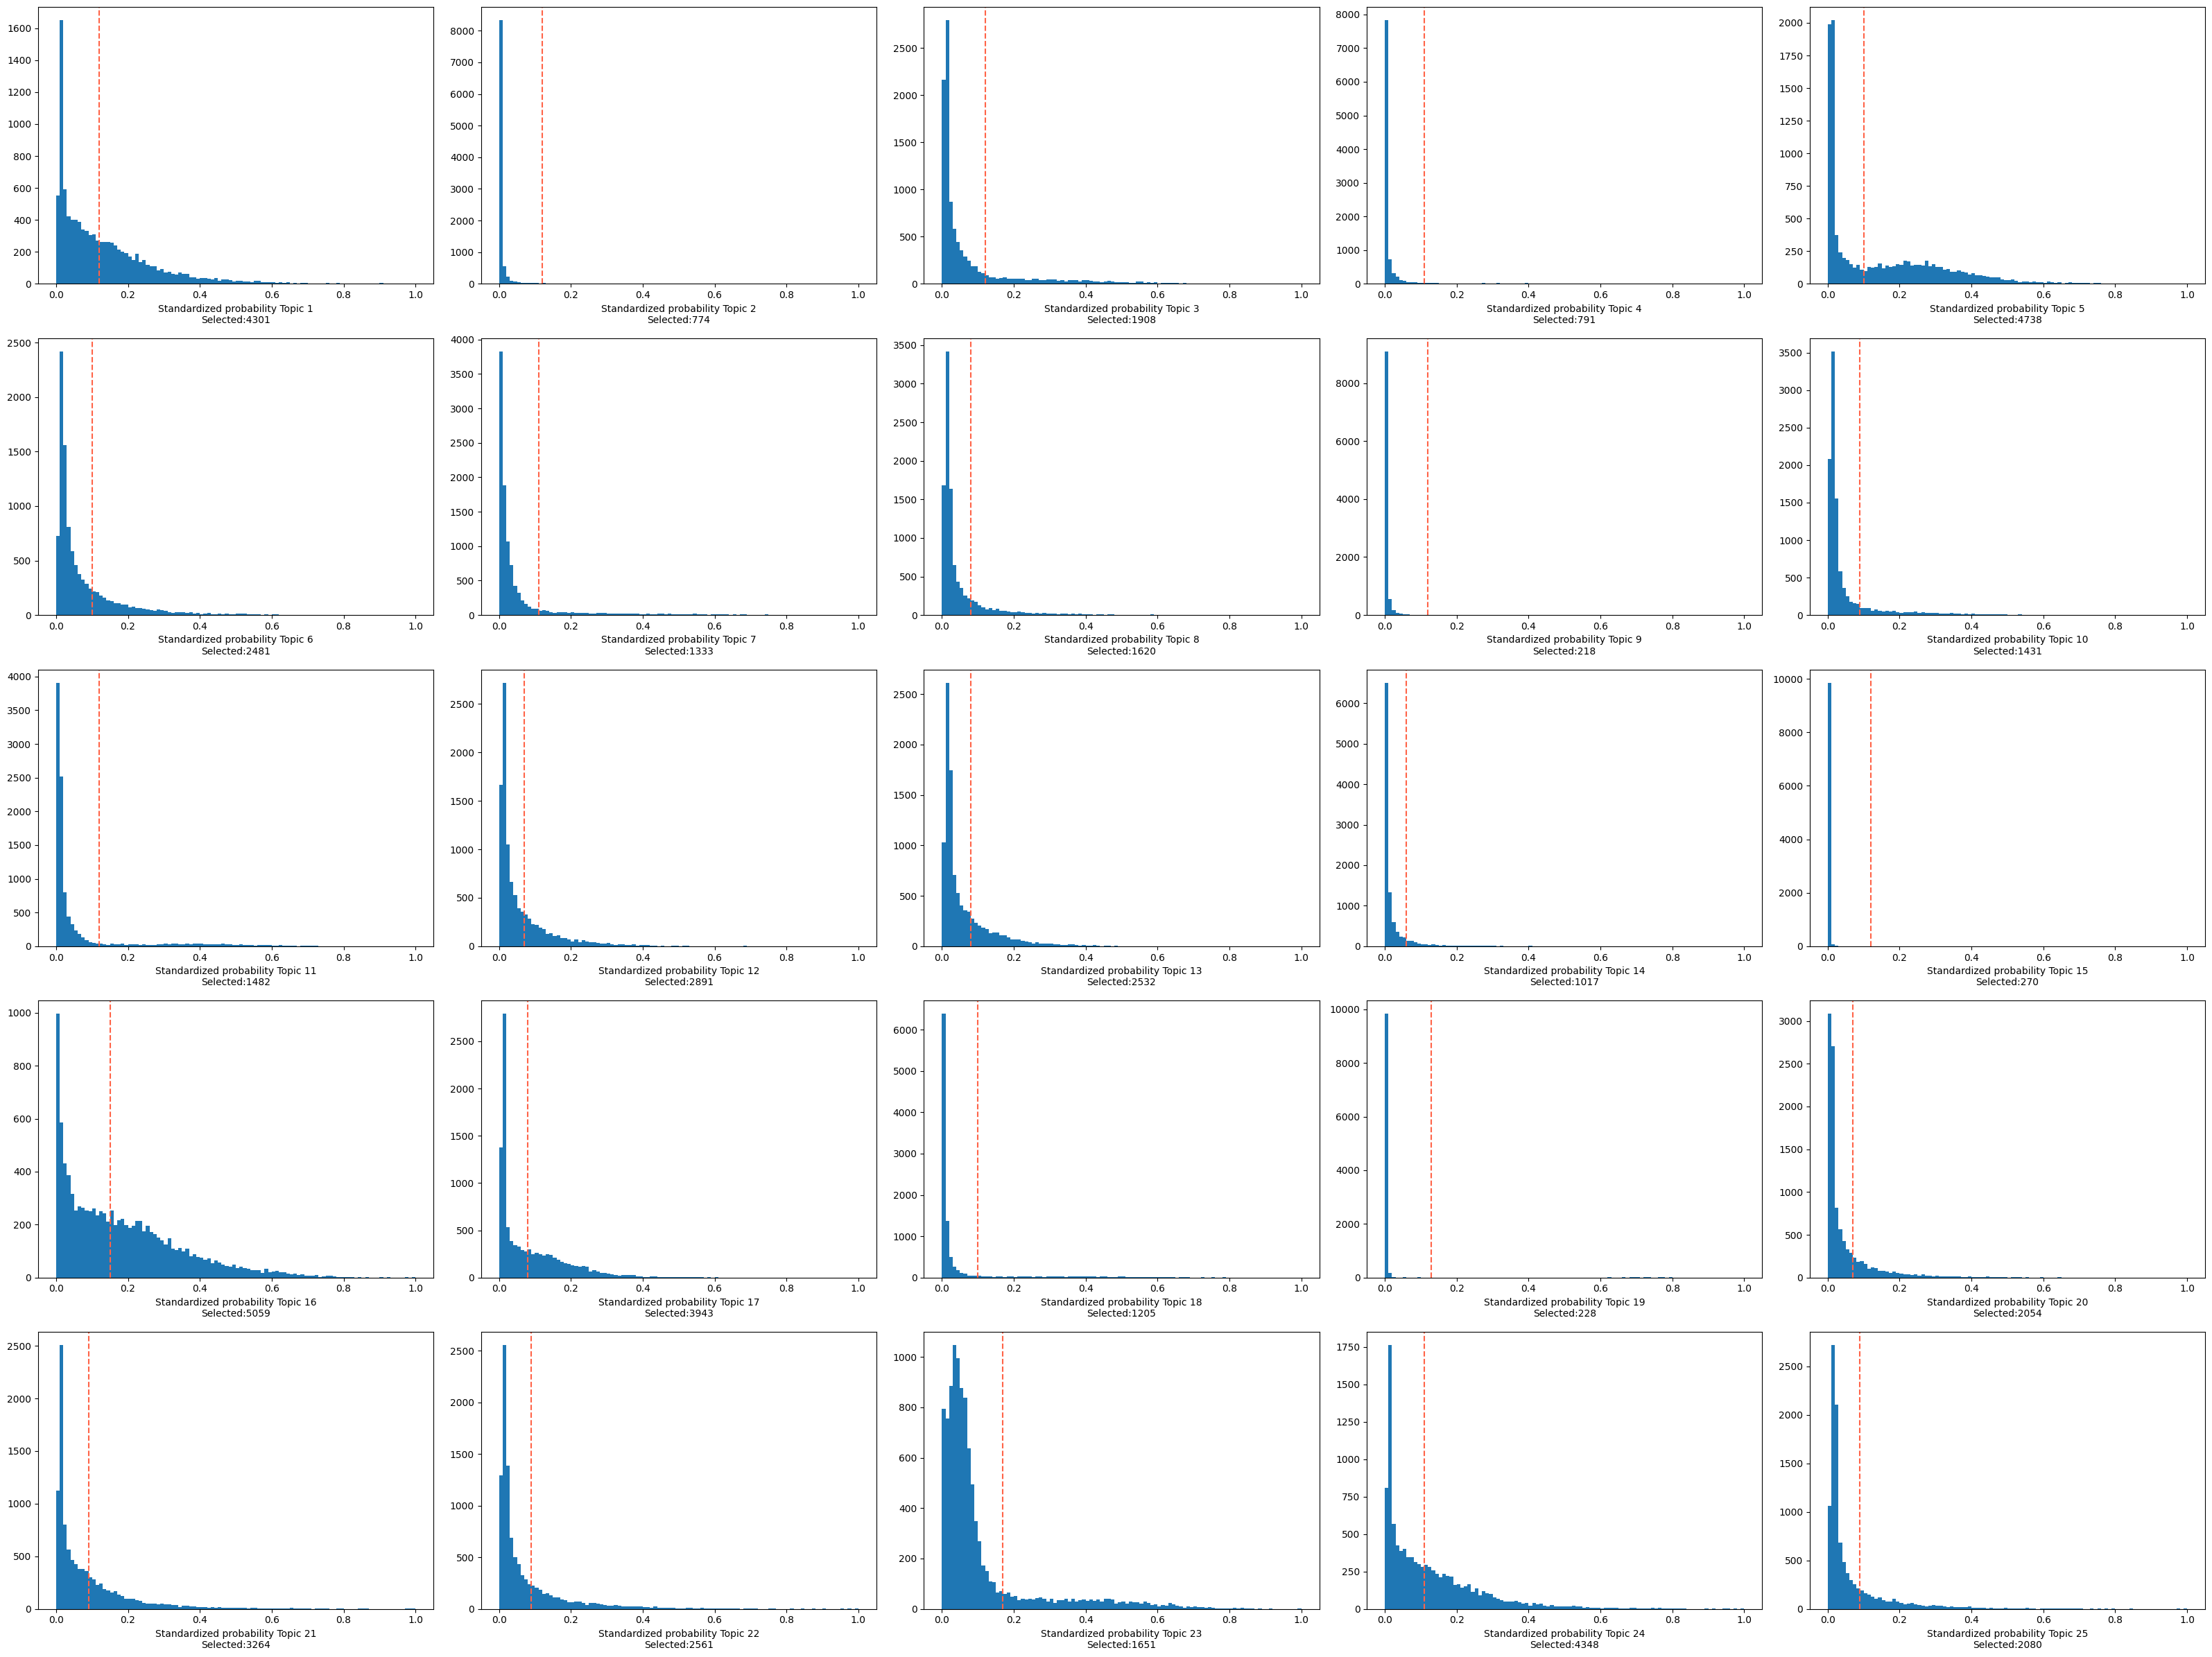

In [50]:
binarized_cell_topic = binarize_topics(
    cistopic_obj,
    target='cell',
    method='li',
    plot=True,
    num_columns=5, nbins=100)

In [51]:
from pycisTopic.topic_qc import compute_topic_metrics, plot_topic_qc, topic_annotation
import matplotlib.pyplot as plt
from pycisTopic.utils import fig2img

In [52]:
topic_qc_metrics = compute_topic_metrics(cistopic_obj)

In [53]:
fig_dict={}
fig_dict['CoherenceVSAssignments']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Log10_Assignments', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['AssignmentsVSCells_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Log10_Assignments', var_y='Cells_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSCells_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Cells_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSRegions_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Regions_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSMarginal_dist']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Marginal_topic_dist', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSGini_index']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Gini_index', var_color='Gini_index', plot=False, return_fig=True)

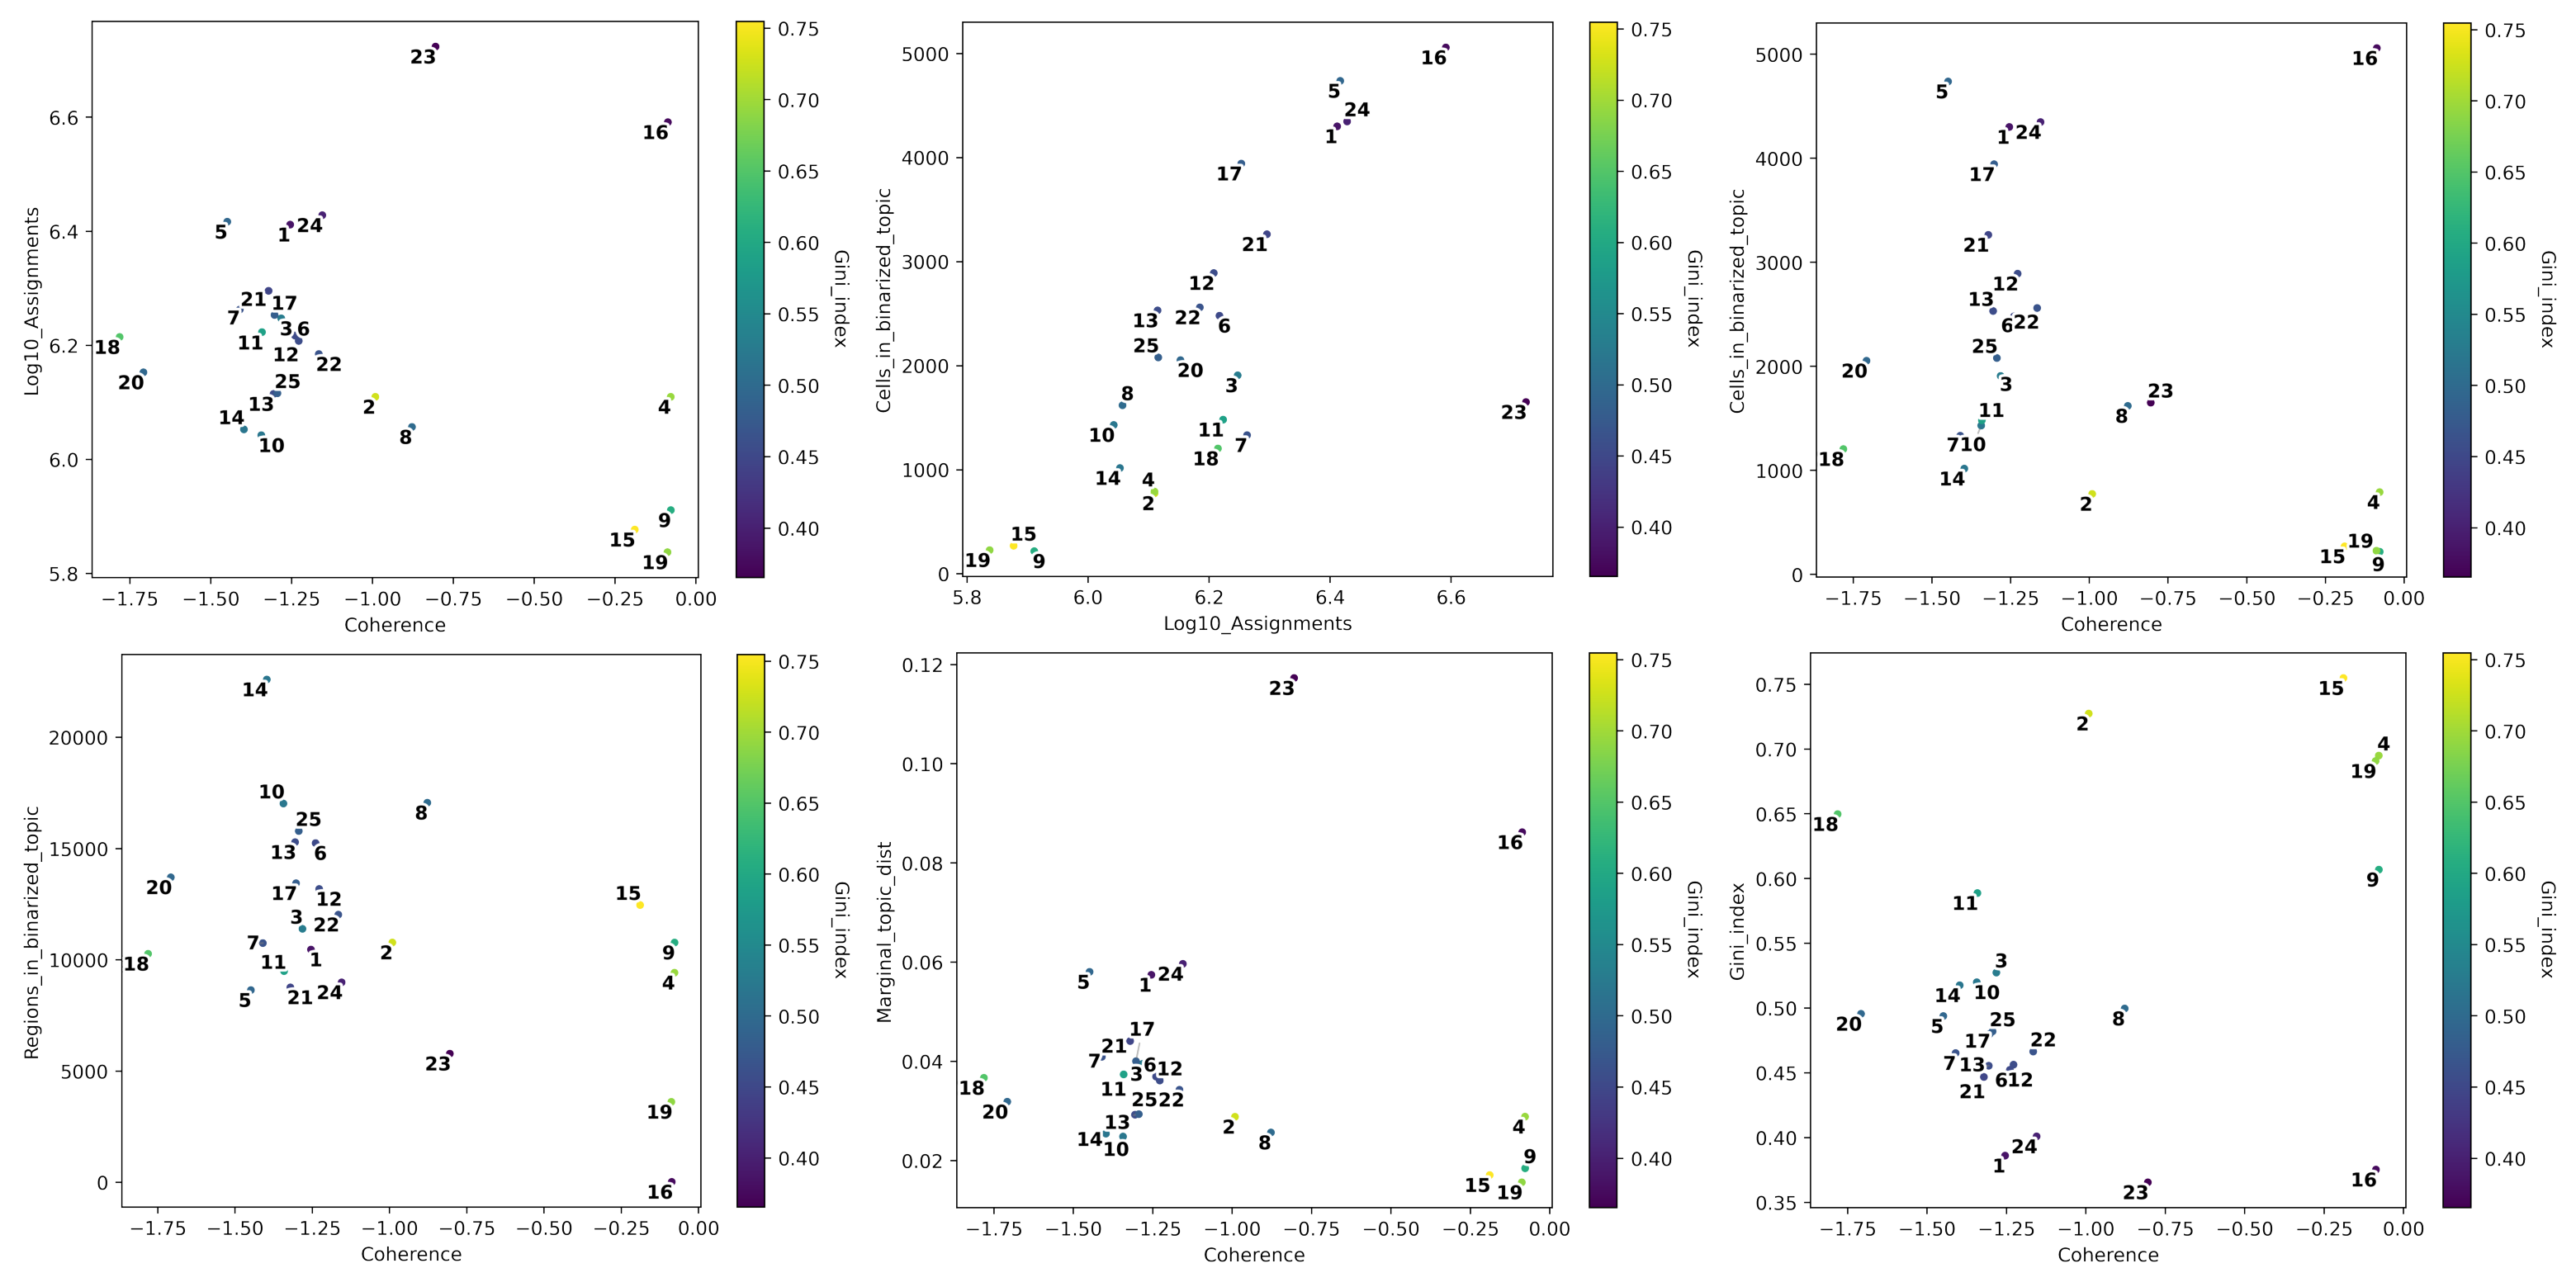

In [54]:
# Plot topic stats in one figure
fig=plt.figure(figsize=(40, 43))
i = 1
for fig_ in fig_dict.keys():
    plt.subplot(2, 3, i)
    img = fig2img(fig_dict[fig_]) #To convert figures to png to plot together, see .utils.py. This converts the figure to png.
    plt.imshow(img)
    plt.axis('off')
    i += 1
plt.subplots_adjust(wspace=0, hspace=-0.70)
plt.show()

Number of assignments

Topic coherence (Mimno et al., 2011): Measures to which extent high scoring regions in the topic are actually co-accessible in the original data. If it is low it indicates that the topic is rather random. The higher, the better is a topic.

The marginal topic distribution: Indicates how much each topic contributes to the model. The higher, the better is a topic.

The gini index: Value between 0 and 1, that indicates the specificity of topics (0: General, 1:Specific)

If topics have been binarized, the number of regions/cells per topic will be added.

# Cell type - topic annotation

In [55]:
topic_annot = topic_annotation(
    cistopic_obj,
    annot_var='cell_type_all',
    binarized_cell_topic=binarized_cell_topic,
    general_topic_thr = 0.2
)

/opt/venv/lib/python3.11/site-packages/statsmodels/stats/weightstats.py:792: RuntimeWarning: divide by zero encountered in scalar divide
  zstat = value / std


In [56]:
topic_annot

cell_type_all  \
Topic1                      Pro-B_cells_Q1, Pro-B_cells_Q3   
Topic2   Tem_Trm_cytotoxic_T_cells, CD16pos_NK_cells, T...   
Topic3                                      Pro-B_cells_D0   
Topic4   Tem_Trm_cytotoxic_T_cells, Tcm_Naive_helper_T_...   
Topic5                                      Pro-B_cells_Q1   
Topic6                      Pro-B_cells_D0, Pro-B_cells_Q1   
Topic7   Tem_Trm_cytotoxic_T_cells, Non-classical_monoc...   
Topic8                                      Pro-B_cells_Q2   
Topic9                       Pro-B_cells_D0, Naive_B_cells   
Topic10                Pro-B_cells_D0, Classical_monocytes   
Topic11                                     Pro-B_cells_Q3   
Topic12     Pro-B_cells_Q2, Pro-B_cells_Q1, Pro-B_cells_Q3   
Topic13                                     Pro-B_cells_Q1   
Topic14  Tem_Trm_cytotoxic_T_cells, Non-classical_monoc...   
Topic15       Non-classical_monocytes, Classical_monocytes   
Topic16                                     Pro-B_cells_Q1   
Topic17                     Pro-B_cells_Q2, Pro-B_cells_Q1   
Topic18                                     Pro-B_cells_Q2   
Topic19                                     Pro-B_cells_Q3   
Topic20  Pro-B_cells_D0, Non-classical_monocytes, Pro-B...   
Topic21                     Pro-B_cells_Q1, Pro-B_cells_Q3   
Topic22                                     Pro-B_cells_D0   
Topic23  Tem_Trm_cytotoxic_T_cells, Non-classical_monoc...   
Topic24                     Pro-B_cells_D0, Pro-B_cells_Q1   
Topic25     Pro-B_cells_D0, Pro-B_cells_Q2, Pro-B_cells_Q3   

        Ratio_cells_in_topic Ratio_group_in_population  is_general  
Topic1              0.418874                  0.621932       False  
Topic2               0.07538                  0.080736       False  
Topic3               0.18582                  0.162252       False  
Topic4              0.077035                  0.049864       False  
Topic5              0.461434                  0.453058       False  
Topic6              0.241624                   0.61531       False  
Topic7              0.129821                  0.119303       False  
Topic8              0.157772                  0.096513       False  
Topic9              0.021231                  0.175302       False  
Topic10             0.139365                  0.180756       False  
Topic11             0.144332                  0.168874       False  
Topic12             0.281554                  0.718446       False  
Topic13             0.246591                  0.453058       False  
Topic14             0.099046                   0.38469       False  
Topic15             0.026295                  0.025516       False  
Topic16             0.492696                  0.453058       False  
Topic17             0.384009                  0.549571       False  
Topic18             0.117355                  0.096513       False  
Topic19             0.022205                  0.168874       False  
Topic20             0.200039                  0.453155       False  
Topic21             0.317881                  0.621932       False  
Topic22             0.249416                  0.162252       False  
Topic23             0.160791                  0.119303       False  
Topic24             0.423451                   0.61531       False  
Topic25             0.202571                  0.427639       False

# DAR

In [57]:
from pycisTopic.diff_features import (
    impute_accessibility,
    normalize_scores,
    find_highly_variable_features,
    find_diff_features
)
import numpy as np

In [58]:
imputed_acc_obj = impute_accessibility(
    cistopic_obj,
    selected_cells=None,
    selected_regions=None,
    scale_factor=10**6
)

2025-07-10 11:52:36,322 cisTopic     INFO     Imputing region accessibility
2025-07-10 11:52:36,323 cisTopic     INFO     Impute region accessibility for regions 0-20000
2025-07-10 11:52:37,268 cisTopic     INFO     Impute region accessibility for regions 20000-40000
2025-07-10 11:52:38,195 cisTopic     INFO     Impute region accessibility for regions 40000-60000
2025-07-10 11:52:39,116 cisTopic     INFO     Impute region accessibility for regions 60000-80000
2025-07-10 11:52:40,031 cisTopic     INFO     Impute region accessibility for regions 80000-100000
2025-07-10 11:52:40,950 cisTopic     INFO     Impute region accessibility for regions 100000-120000
2025-07-10 11:52:41,869 cisTopic     INFO     Impute region accessibility for regions 120000-140000
2025-07-10 11:52:42,788 cisTopic     INFO     Impute region accessibility for regions 140000-160000
2025-07-10 11:52:43,714 cisTopic     INFO     Impute region accessibility for regions 160000-180000
2025-07-10 11:52:44,636 cisTopic     

In [59]:
normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)

2025-07-10 11:52:45,130 cisTopic     INFO     Normalizing imputed data
2025-07-10 11:52:54,233 cisTopic     INFO     Done!


2025-07-10 11:52:54,237 cisTopic     INFO     Calculating mean
2025-07-10 11:52:56,088 cisTopic     INFO     Calculating variance


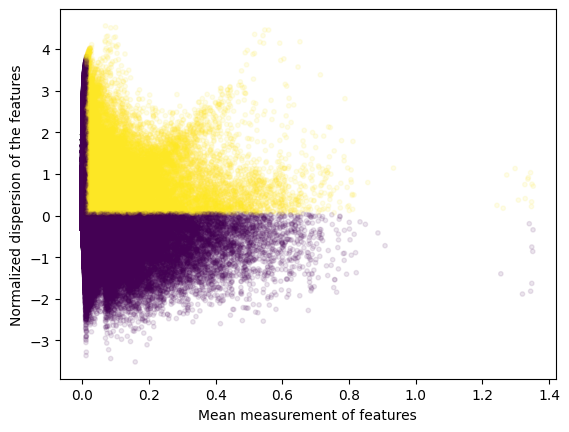

2025-07-10 11:53:11,565 cisTopic     INFO     Done!


In [60]:
variable_regions = find_highly_variable_features(
    normalized_imputed_acc_obj,
    min_disp = 0.05,
    min_mean = 0.0125,
    max_mean = 3,
    max_disp = np.inf,
    n_bins=20,
    n_top_features=None,
    plot=True
)

In [61]:
len(variable_regions)

38841

In [ ]:
markers_dict= find_diff_features(
    cistopic_obj,
    imputed_acc_obj,
    variable='cell_type_all',
    var_features=variable_regions,
    contrasts=None,
    adjpval_thr=0.05,
    log2fc_thr=np.log2(1.5),
    n_cpu=5,
    _temp_dir='/ray_spill',
    split_pattern = '-'
)

2025-07-10 11:53:17,157	INFO worker.py:1724 -- Started a local Ray instance.


2025-07-10 11:53:18,176 cisTopic     INFO     Subsetting data for CD16pos_NK_cells (317 of 10268)
2025-07-10 11:53:22,724 cisTopic     INFO     Computing p-value for CD16pos_NK_cells
2025-07-10 11:53:31,117 cisTopic     INFO     Computing log2FC for CD16pos_NK_cells
2025-07-10 11:53:32,984 cisTopic     INFO     CD16pos_NK_cells done!
2025-07-10 11:53:32,991 cisTopic     INFO     Subsetting data for Classical_monocytes (190 of 10268)
2025-07-10 11:53:33,055 cisTopic     INFO     Computing p-value for Classical_monocytes
2025-07-10 11:53:40,227 cisTopic     INFO     Computing log2FC for Classical_monocytes
2025-07-10 11:53:40,279 cisTopic     INFO     Classical_monocytes done!
2025-07-10 11:53:40,286 cisTopic     INFO     Subsetting data for Naive_B_cells (134 of 10268)
2025-07-10 11:53:40,348 cisTopic     INFO     Computing p-value for Naive_B_cells
2025-07-10 11:53:47,693 cisTopic     INFO     Computing log2FC for Naive_B_cells
2025-07-10 11:53:47,748 cisTopic     INFO     Naive_B_cell

In [63]:
from pycisTopic.clust_vis import plot_imputed_features

In [64]:
cistopic_obj.cell_data.cell_type_all.value_counts()

Pro-B_cells_Q1               4652
Pro-B_cells_Q3               1734
Pro-B_cells_D0               1666
Pro-B_cells_Q2                991
CD16pos_NK_cells              317
Tem_Trm_cytotoxic_T_cells     297
Tcm_Naive_helper_T_cells      215
Classical_monocytes           190
Naive_B_cells                 134
Non-classical_monocytes        72
Name: cell_type_all, dtype: int64

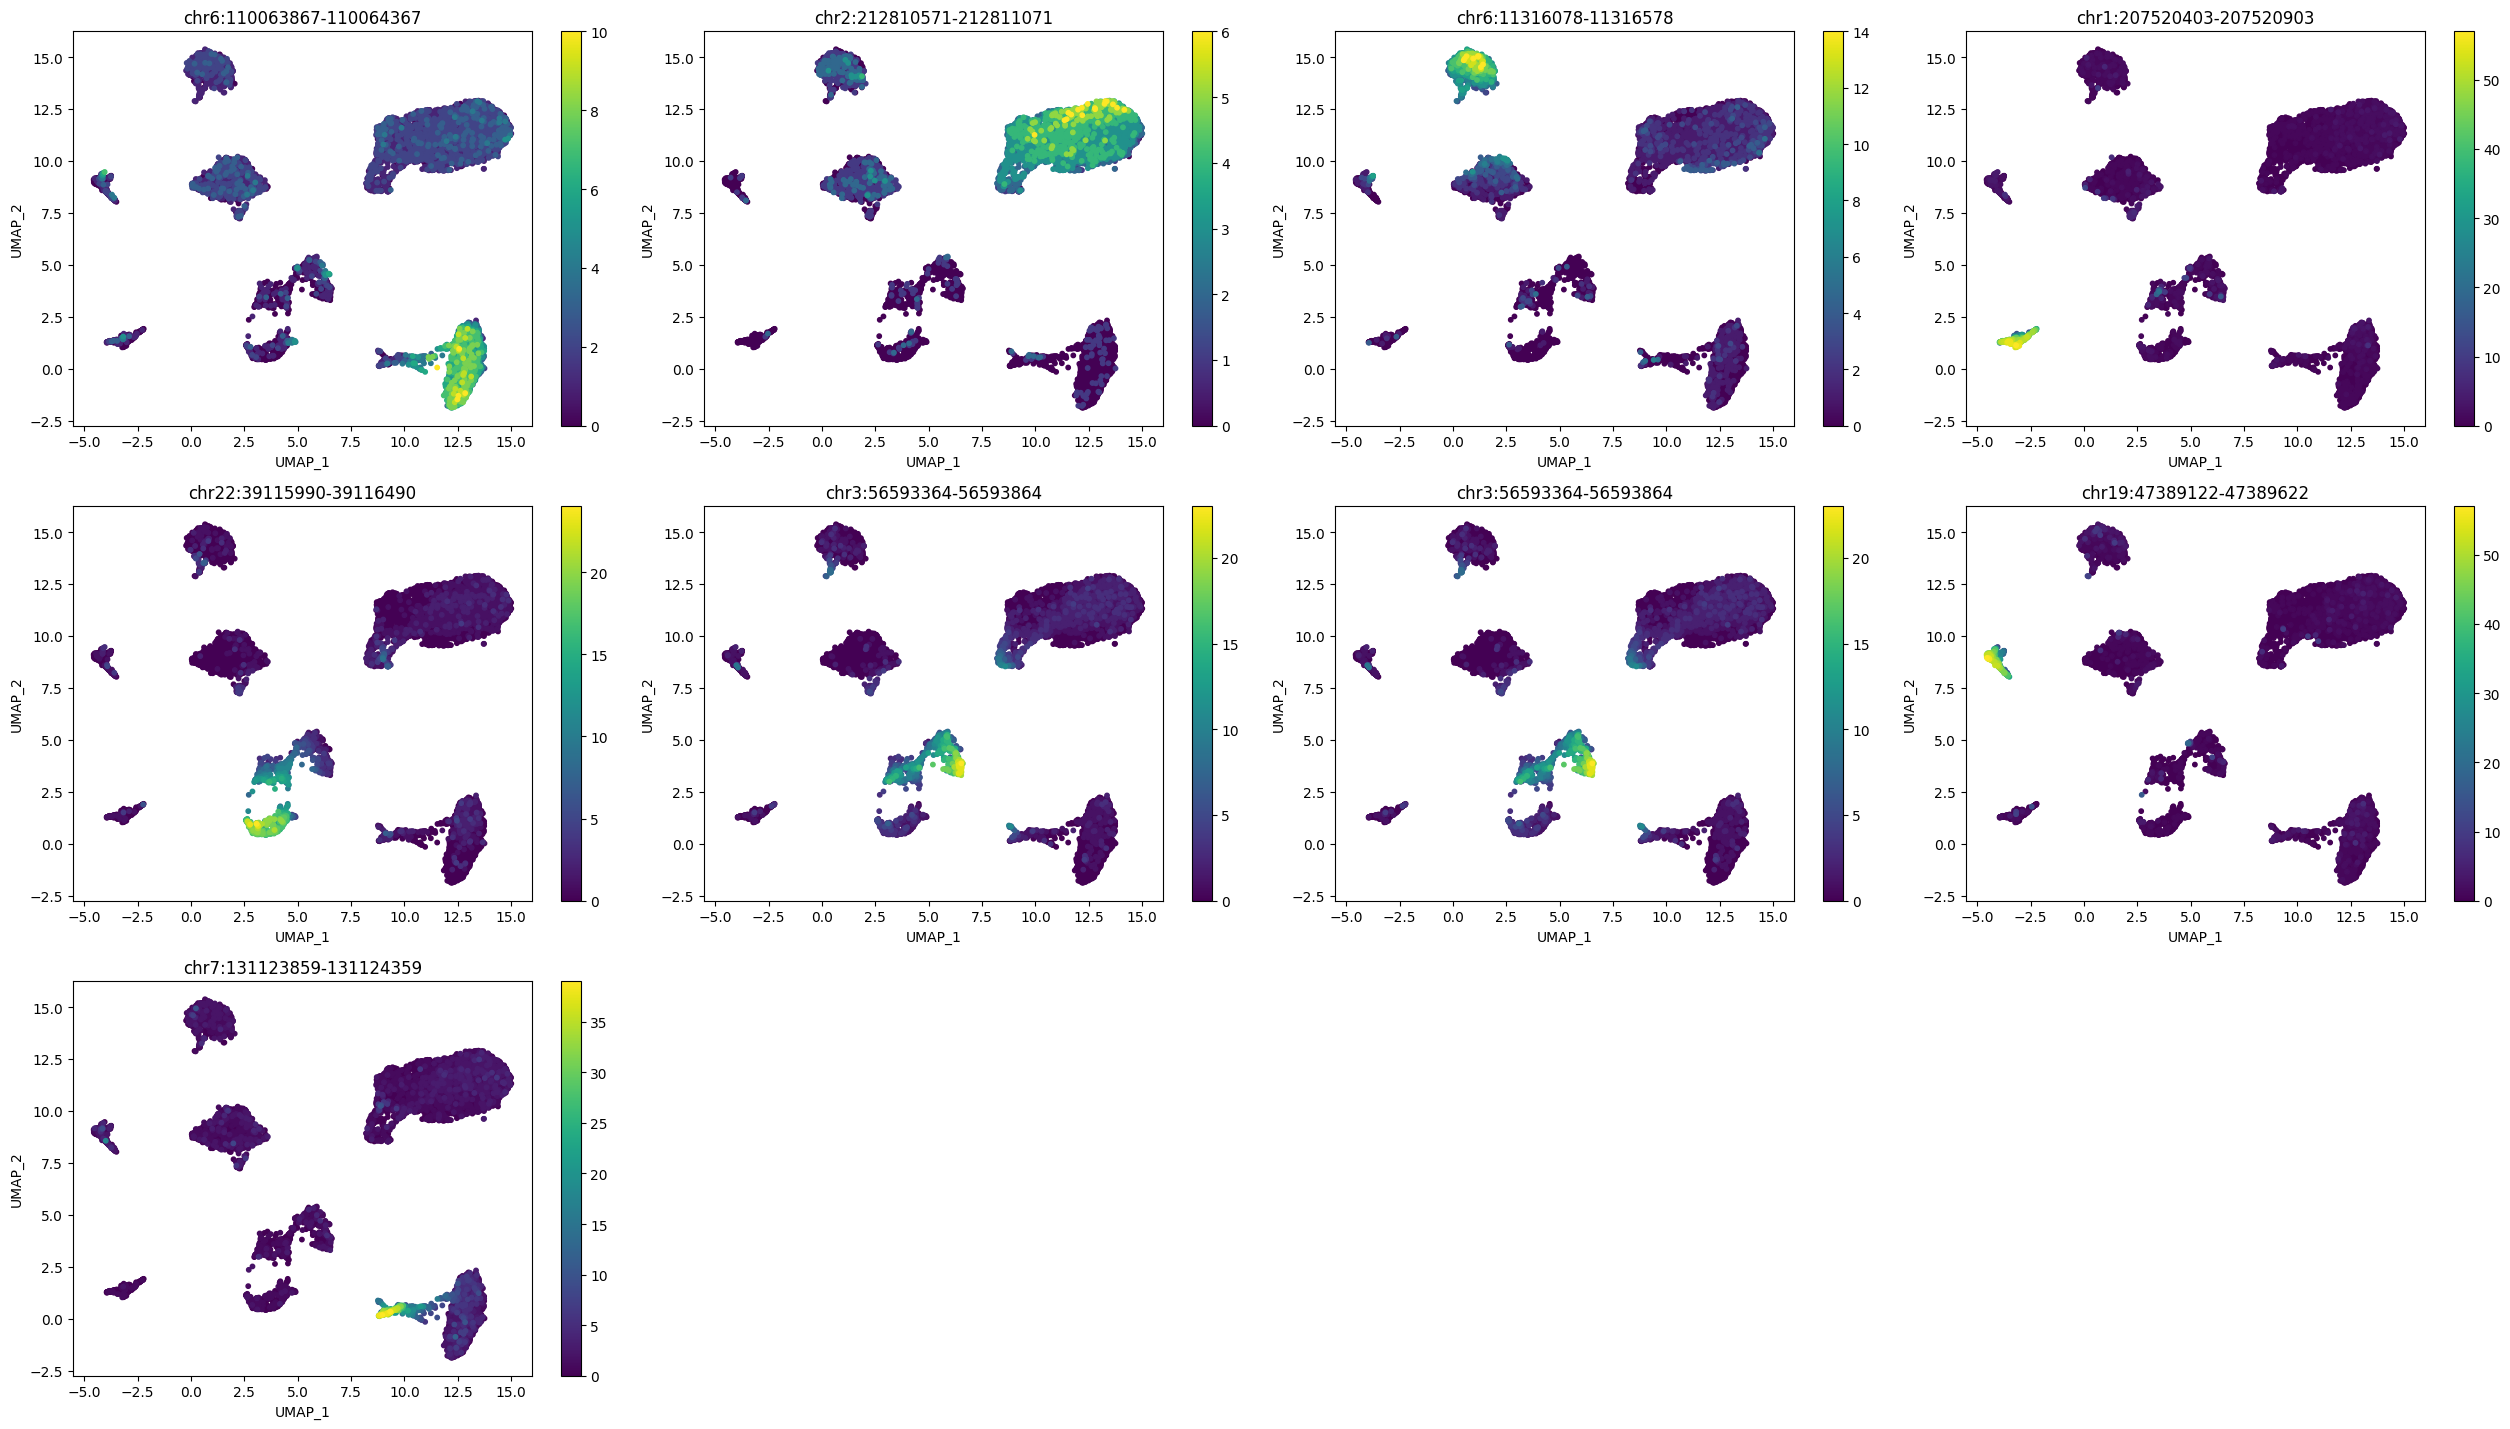

In [65]:
plot_imputed_features(
    cistopic_obj,
    reduction_name='UMAP',
    imputed_data=imputed_acc_obj,
    features=[markers_dict[x].index.tolist()[0] for x in ['Pro-B_cells_D0','Pro-B_cells_Q1','Pro-B_cells_Q2', 'Pro-B_cells_Q3', 'CD16pos_NK_cells', 'Tcm_Naive_helper_T_cells', 'Tem_Trm_cytotoxic_T_cells',
                                                         'Classical_monocytes','Naive_B_cells']],
    scale=False,
    num_columns=4
)

In [66]:
print("Number of DARs found:")
print("---------------------")
for x in markers_dict:
    print(f"  {x}: {len(markers_dict[x])}")

Number of DARs found:
---------------------
  CD16pos_NK_cells: 10613
  Classical_monocytes: 10248
  Naive_B_cells: 8663
  Non-classical_monocytes: 9432
  Pro-B_cells_D0: 4147
  Pro-B_cells_Q1: 4880
  Pro-B_cells_Q2: 9825
  Pro-B_cells_Q3: 4181
  Tcm_Naive_helper_T_cells: 10715
  Tem_Trm_cytotoxic_T_cells: 12196


In [67]:
# save region sets
os.makedirs(os.path.join(out_dir, "region_sets"), exist_ok = True)
os.makedirs(os.path.join(out_dir, "region_sets", "Topics_otsu"), exist_ok = True)
os.makedirs(os.path.join(out_dir, "region_sets", "Topics_top_3k"), exist_ok = True)
os.makedirs(os.path.join(out_dir, "region_sets", "DARs_cell_type"), exist_ok = True)

In [68]:
from pycisTopic.utils import region_names_to_coordinates

In [69]:
for topic in region_bin_topics_otsu:
    region_names_to_coordinates(
        region_bin_topics_otsu[topic].index
    ).sort_values(
        ["Chromosome", "Start", "End"]
    ).to_csv(
        os.path.join(out_dir, "region_sets", "Topics_otsu", f"{topic}.bed"),
        sep = "\t",
        header = False, index = False
    )

In [70]:
for topic in region_bin_topics_top_3k:
    region_names_to_coordinates(
        region_bin_topics_top_3k[topic].index
    ).sort_values(
        ["Chromosome", "Start", "End"]
    ).to_csv(
        os.path.join(out_dir, "region_sets", "Topics_top_3k", f"{topic}.bed"),
        sep = "\t",
        header = False, index = False
    )

In [71]:
for cell_type in markers_dict:
    region_names_to_coordinates(
        markers_dict[cell_type].index
    ).sort_values(
        ["Chromosome", "Start", "End"]
    ).to_csv(
        os.path.join(out_dir, "region_sets", "DARs_cell_type", f"{cell_type}.bed"),
        sep = "\t",
        header = False, index = False
    )

# Gene activity

In [72]:
import pyranges as pr
from pycisTopic.gene_activity import get_gene_activity

In [73]:
chromsizes = pd.read_table(os.path.join(out_dir, "qc", "hg38.chrom_sizes_and_alias.tsv"))
chromsizes

# ucsc     length             ensembl     refseq_id  genbank_id
0                chr1  248956422                   1  NC_000001.11  CM000663.2
1                chr2  242193529                   2  NC_000002.12  CM000664.2
2                chr3  198295559                   3  NC_000003.12  CM000665.2
3                chr4  190214555                   4  NC_000004.12  CM000666.2
4                chr5  181538259                   5  NC_000005.10  CM000667.2
..                ...        ...                 ...           ...         ...
449  chrUn_KI270539v1        993  HSCHRUN_RANDOM_146   NT_187442.1  KI270539.1
450  chrUn_KI270385v1        990  HSCHRUN_RANDOM_195   NT_187487.1  KI270385.1
451  chrUn_KI270423v1        981  HSCHRUN_RANDOM_121   NT_187417.1  KI270423.1
452  chrUn_KI270392v1        971  HSCHRUN_RANDOM_193   NT_187485.1  KI270392.1
453  chrUn_KI270394v1        970  HSCHRUN_RANDOM_187   NT_187479.1  KI270394.1

[454 rows x 5 columns]

In [74]:
chromsizes.rename({"# ucsc": "Chromosome", "length": "End"}, axis = 1, inplace = True)
chromsizes["Start"] = 0
chromsizes = pr.PyRanges(chromsizes[["Chromosome", "Start", "End"]])

In [75]:
pr_annotation = pd.read_table(
        os.path.join(out_dir, "qc", "tss.bed")
    ).rename(
        {"Name": "Gene", "# Chromosome": "Chromosome"}, axis = 1)
pr_annotation["Transcription_Start_Site"] = pr_annotation["Start"]
pr_annotation = pr.PyRanges(pr_annotation)
pr_annotation

+--------------+-----------+-----------+------------+------------+-------+
| Chromosome   | Start     | End       | Gene       | Score      | +3    |
| (category)   | (int32)   | (int32)   | (object)   | (object)   | ...   |
|--------------+-----------+-----------+------------+------------+-------|
| GL000009.2   | 58375     | 58376     | nan        | .          | ...   |
| GL000194.1   | 115017    | 115018    | nan        | .          | ...   |
| GL000194.1   | 115054    | 115055    | MAFIP      | .          | ...   |
| GL000195.1   | 49163     | 49164     | nan        | .          | ...   |
| ...          | ...       | ...       | ...        | ...        | ...   |
| chrY         | 6872607   | 6872608   | AMELY      | .          | ...   |
| chrY         | 21918031  | 21918032  | RBMY1E     | .          | ...   |
| chrY         | 24047968  | 24047969  | CDY1B      | .          | ...   |
| chrY         | 24048018  | 24048019  | CDY1B      | .          | ...   |
+--------------+-----------+-----------+------------+------------+-------+
Stranded PyRanges object has 87,561 rows and 8 columns from 407 chromosomes.
For printing, the PyRanges was sorted on Chromosome and Strand.
3 hidden columns: Strand, Transcript_type, Transcription_Start_Site

In [76]:
gene_act, weigths = get_gene_activity(
    imputed_acc_obj,
    pr_annotation,
    chromsizes,
    use_gene_boundaries=True, # Whether to use the whole search space or stop when encountering another gene
    upstream=[1000, 100000], # Search space upstream. The minimum means that even if there is a gene right next to it
                             # these bp will be taken (1kbp here)
    downstream=[1000,100000], # Search space downstream
    distance_weight=True, # Whether to add a distance weight (an exponential function, the weight will decrease with distance)
    decay_rate=1, # Exponent for the distance exponential funciton (the higher the faster will be the decrease)
    extend_gene_body_upstream=10000, # Number of bp upstream immune to the distance weight (their value will be maximum for
                          #this weight)
    extend_gene_body_downstream=500, # Number of bp downstream immune to the distance weight
    gene_size_weight=False, # Whether to add a weights based on the length of the gene
    gene_size_scale_factor='median', # Dividend to calculate the gene size weigth. Default is the median value of all genes
                          #in the genome
    remove_promoters=False, # Whether to remove promoters when computing gene activity scores
    average_scores=True, # Whether to divide by the total number of region assigned to a gene when calculating the gene
                          #activity score
    scale_factor=1, # Value to multiply for the final gene activity matrix
    extend_tss=[10,10], # Space to consider a promoter
    gini_weight = True, # Whether to add a gini index weigth. The more unique the region is, the higher this weight will be
    return_weights= True, # Whether to return the final weights
    project='Gene_activity') # Project name for the gene activity object

2025-07-10 11:56:04,169 cisTopic     INFO     Calculating gene boundaries
2025-07-10 11:56:20,478 cisTopic     INFO     Calculating distances


join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


2025-07-10 11:56:29,751 cisTopic     INFO     Calculating distance weigths
2025-07-10 11:56:30,296 cisTopic     INFO     Distance weights done
2025-07-10 11:56:30,296 cisTopic     INFO     Calculating gini weights
2025-07-10 11:56:48,782 cisTopic     INFO     Getting gene activity scores
2025-07-10 11:59:01,041 cisTopic     INFO     Creating imputed features object


In [ ]:
DAG_markers_dict= find_diff_features(
    cistopic_obj,
    gene_act,
    variable='cell_type_all',
    var_features=None,
    contrasts=None,
    adjpval_thr=0.05,
    log2fc_thr=np.log2(1.5),
    n_cpu=5,
    _temp_dir='/ray_spill',
    split_pattern = '-')

2025-07-10 11:59:05,185	INFO worker.py:1724 -- Started a local Ray instance.


2025-07-10 11:59:06,160 cisTopic     INFO     Subsetting data for CD16pos_NK_cells (317 of 10268)
2025-07-10 11:59:08,820 cisTopic     INFO     Computing p-value for CD16pos_NK_cells
2025-07-10 11:59:15,075 cisTopic     INFO     Computing log2FC for CD16pos_NK_cells
2025-07-10 11:59:16,653 cisTopic     INFO     CD16pos_NK_cells done!
2025-07-10 11:59:16,661 cisTopic     INFO     Subsetting data for Classical_monocytes (190 of 10268)
2025-07-10 11:59:16,708 cisTopic     INFO     Computing p-value for Classical_monocytes
2025-07-10 11:59:21,830 cisTopic     INFO     Computing log2FC for Classical_monocytes
2025-07-10 11:59:21,860 cisTopic     INFO     Classical_monocytes done!
2025-07-10 11:59:21,867 cisTopic     INFO     Subsetting data for Naive_B_cells (134 of 10268)
2025-07-10 11:59:21,916 cisTopic     INFO     Computing p-value for Naive_B_cells
2025-07-10 11:59:27,204 cisTopic     INFO     Computing log2FC for Naive_B_cells
2025-07-10 11:59:27,229 cisTopic     INFO     Naive_B_cell

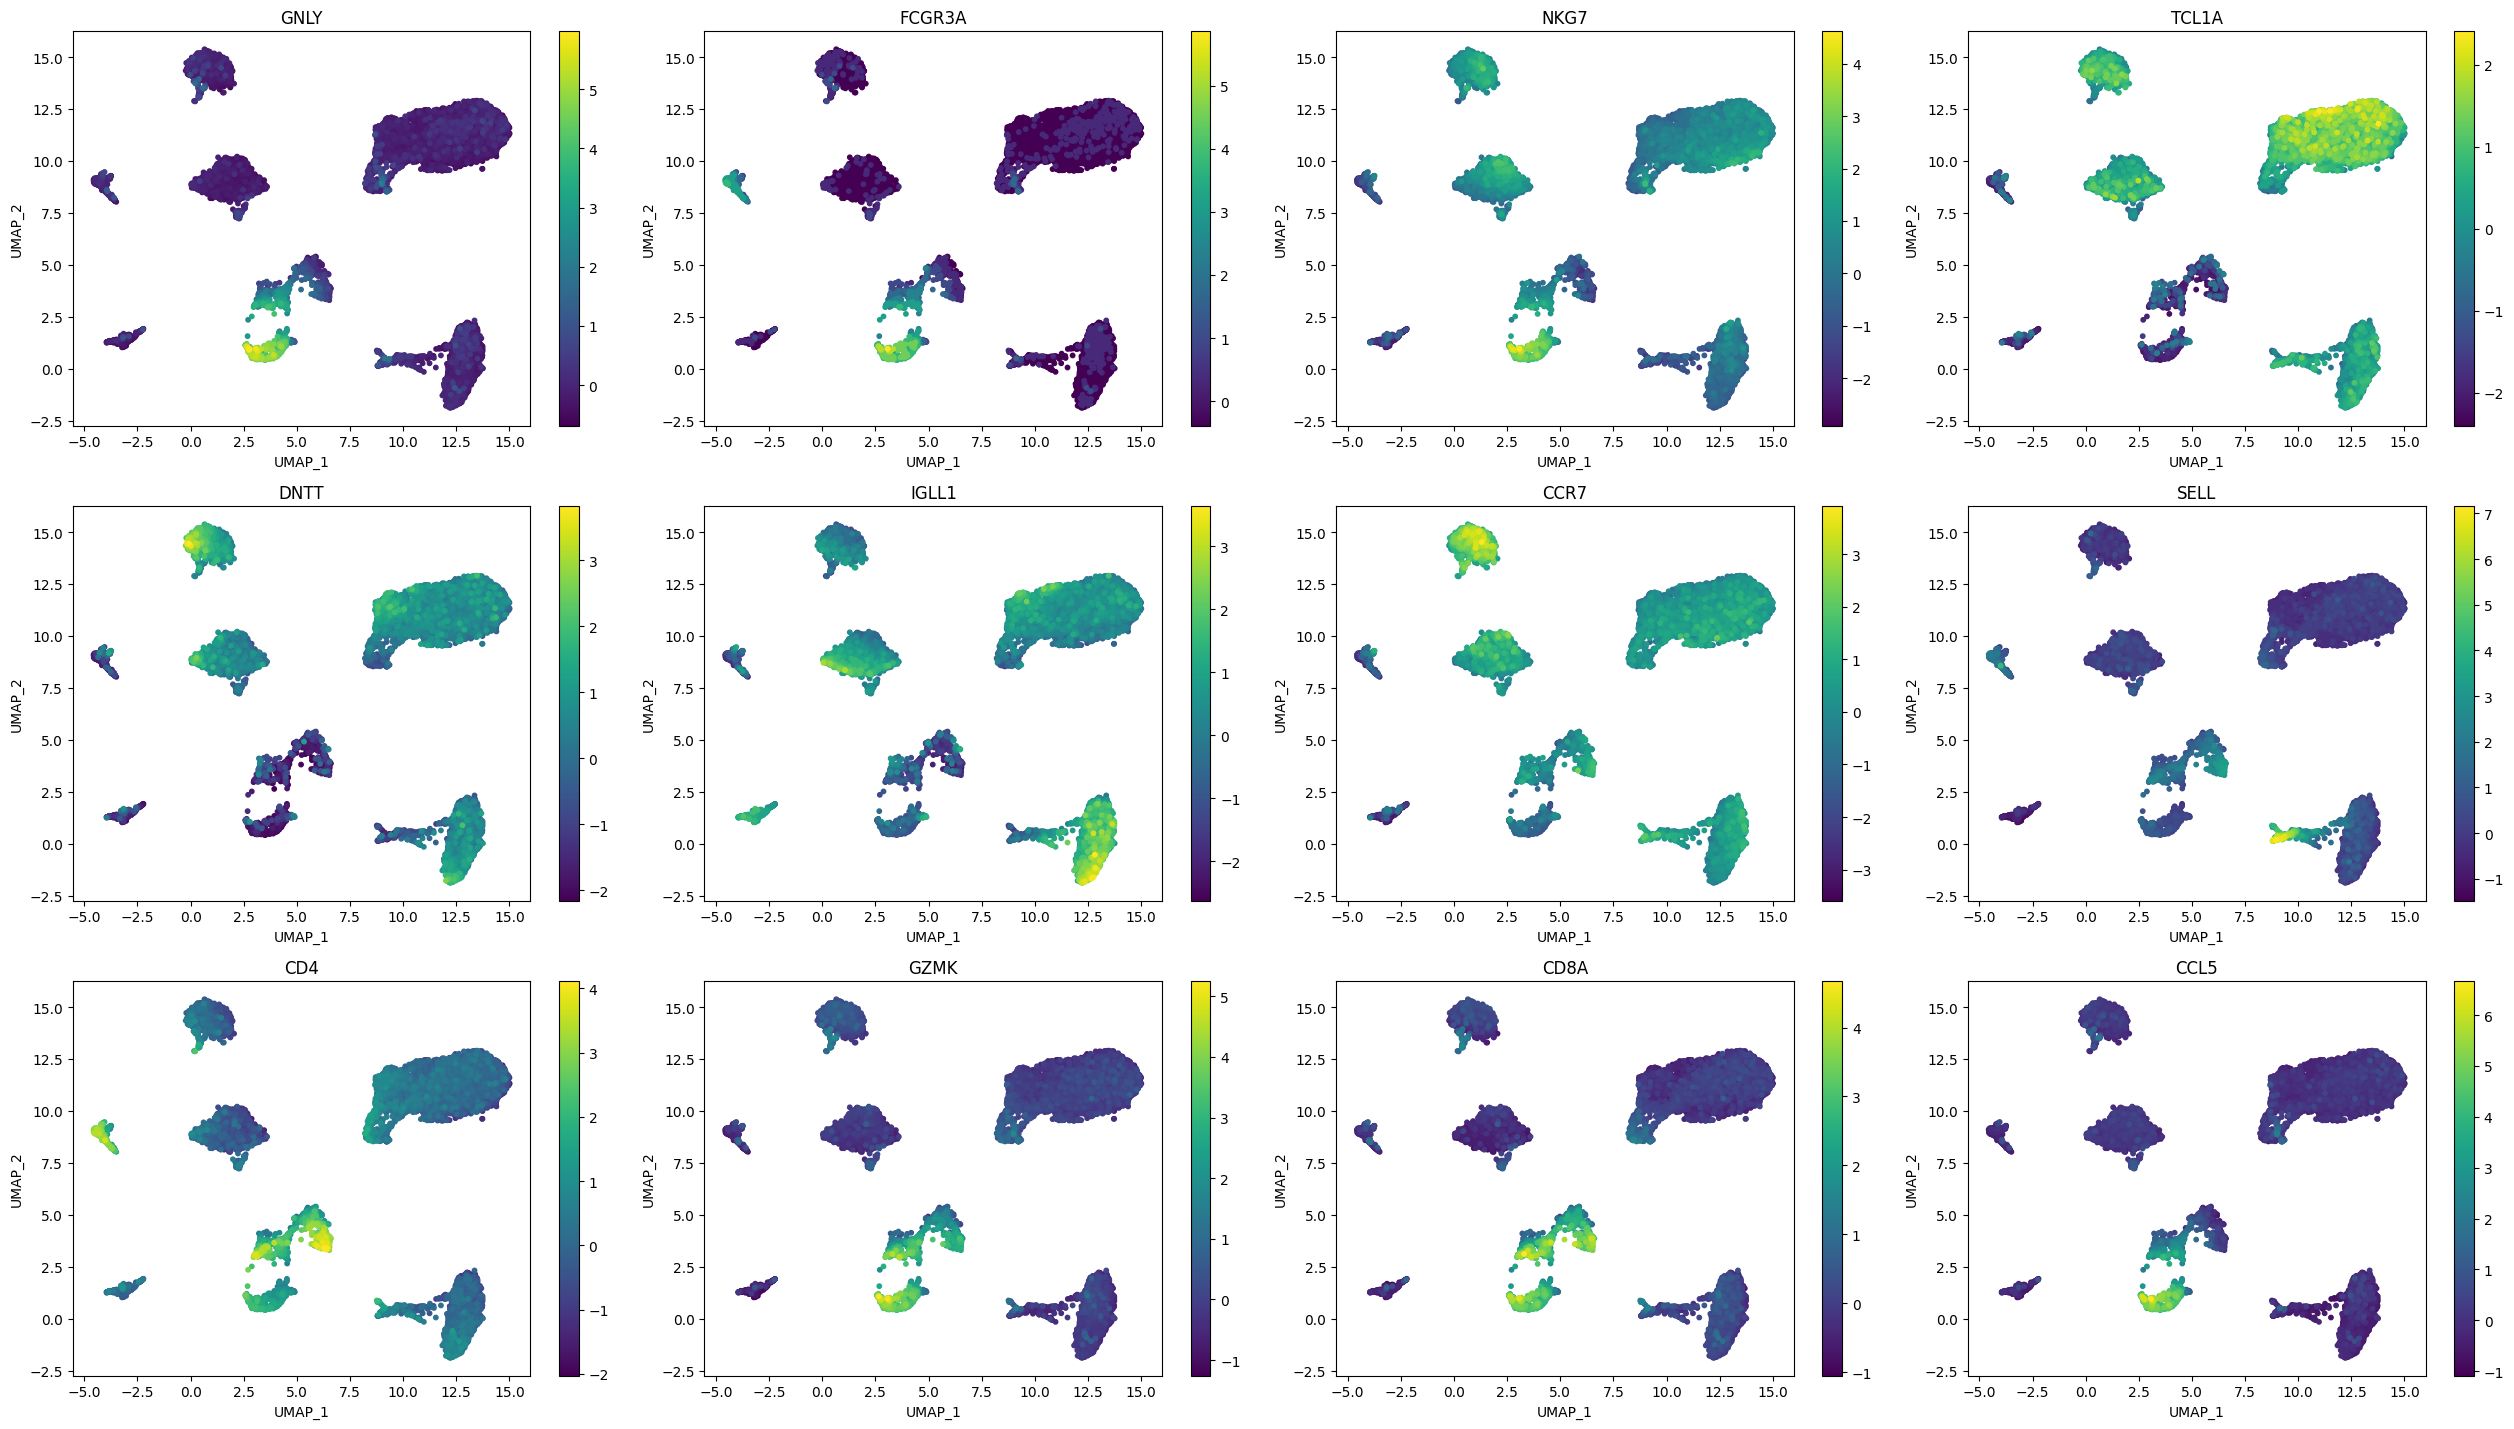

In [79]:
# cell typist
plot_imputed_features(
    cistopic_obj,
    reduction_name='UMAP',
    imputed_data=gene_act,
    features=[
       # 'PRDX2','KCNH2','GYPA', # Mid erythroid
        'GNLY','FCGR3A','NKG7', # CD16+ NK cells
        'TCL1A', # naive B cells
        'DNTT','IGLL1', # Pro-B cells
        'CCR7','SELL','CD4', # Tcm/Naive helper T cells
        'GZMK','CD8A','CCL5'], # Tem/Trm cytotoxic T cells
    scale=True,
    num_columns=4
)


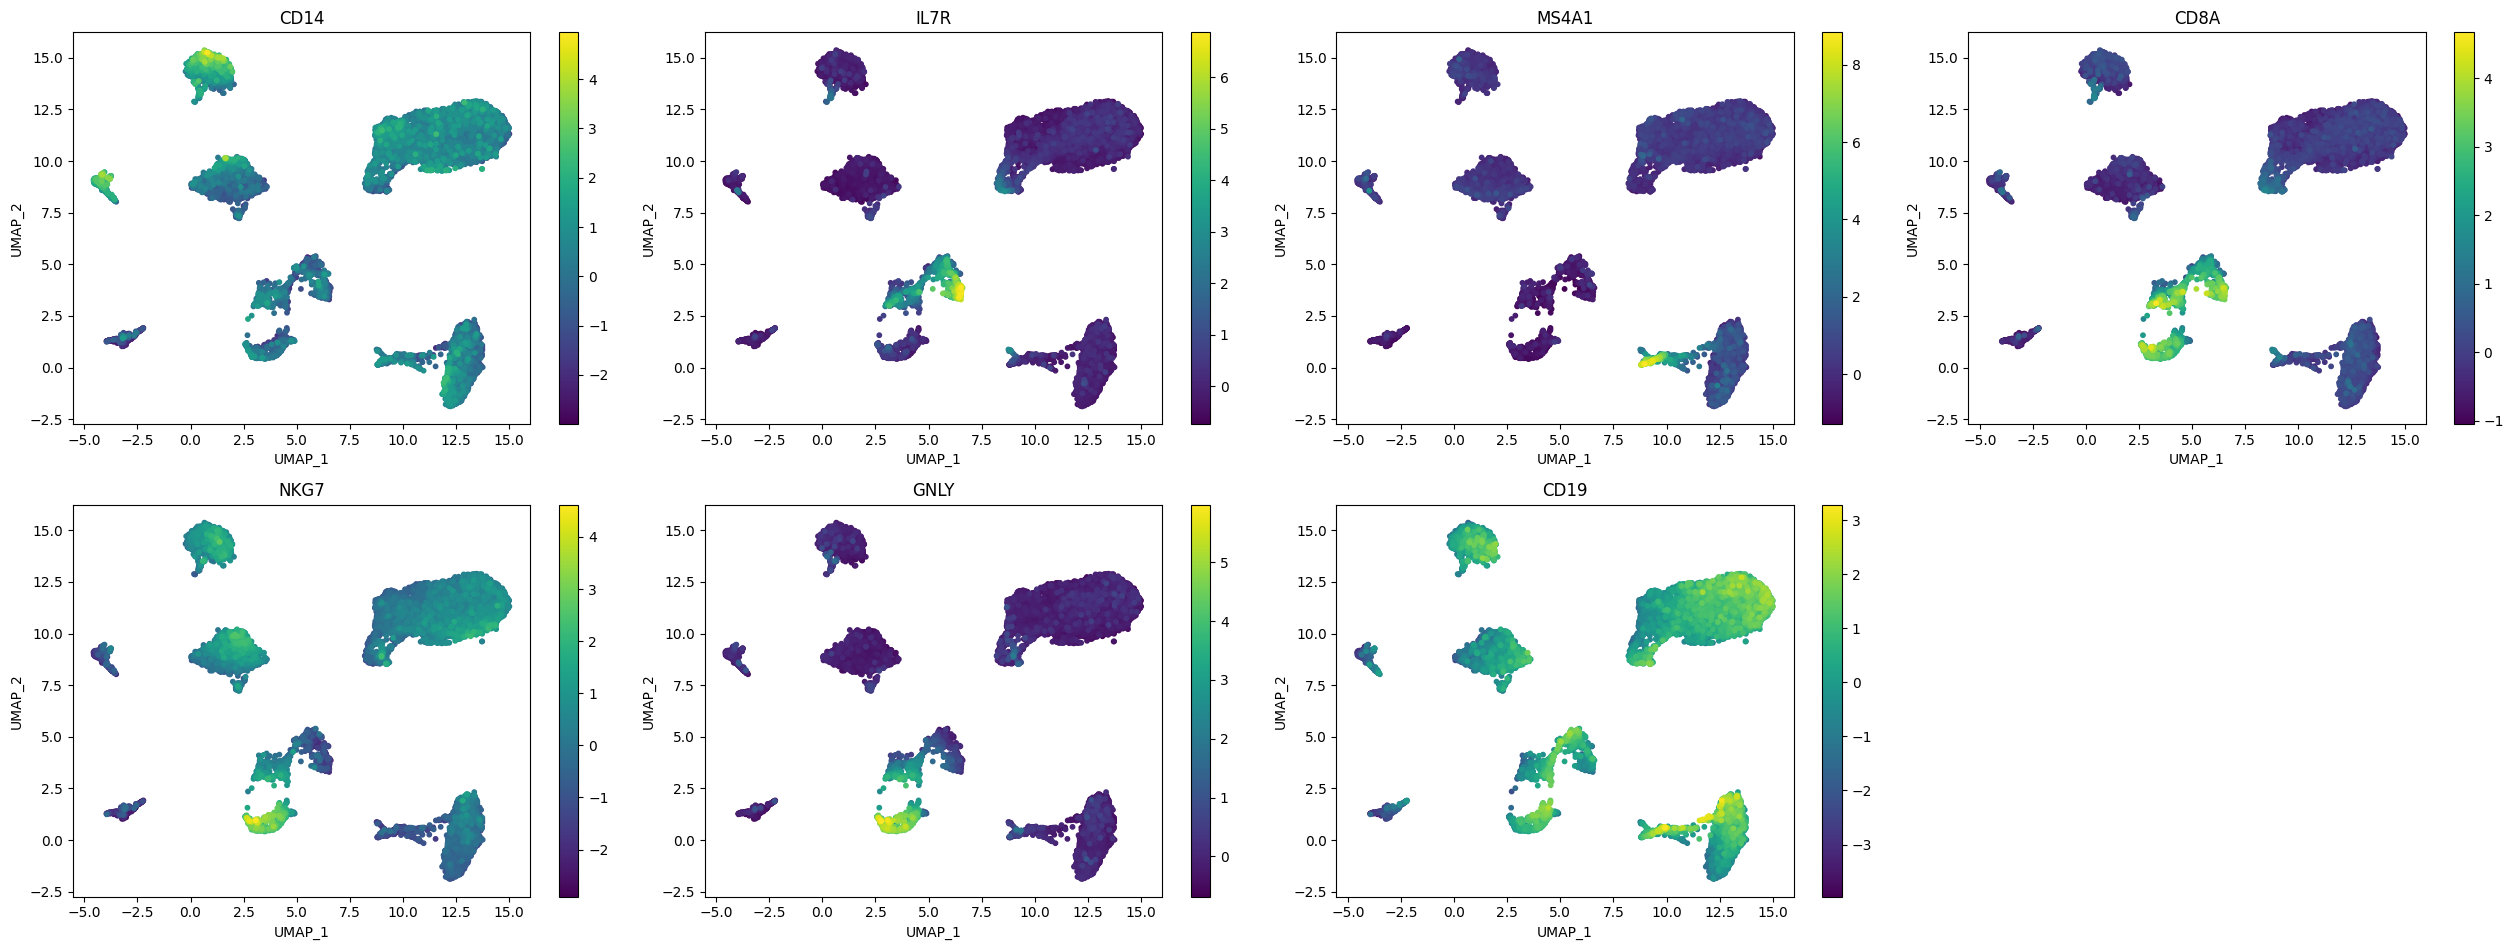

In [80]:
plot_imputed_features(
    cistopic_obj,
    reduction_name='UMAP',
    imputed_data=gene_act,
    features=['CD14', # CD14 mono
              'IL7R', # CD4
              'MS4A1', # B
              'CD8A',  #CD8+T
              'NKG7','GNLY', #NK
              'CD19'], #CD19 B-all
    scale=True,
    num_columns=4
)

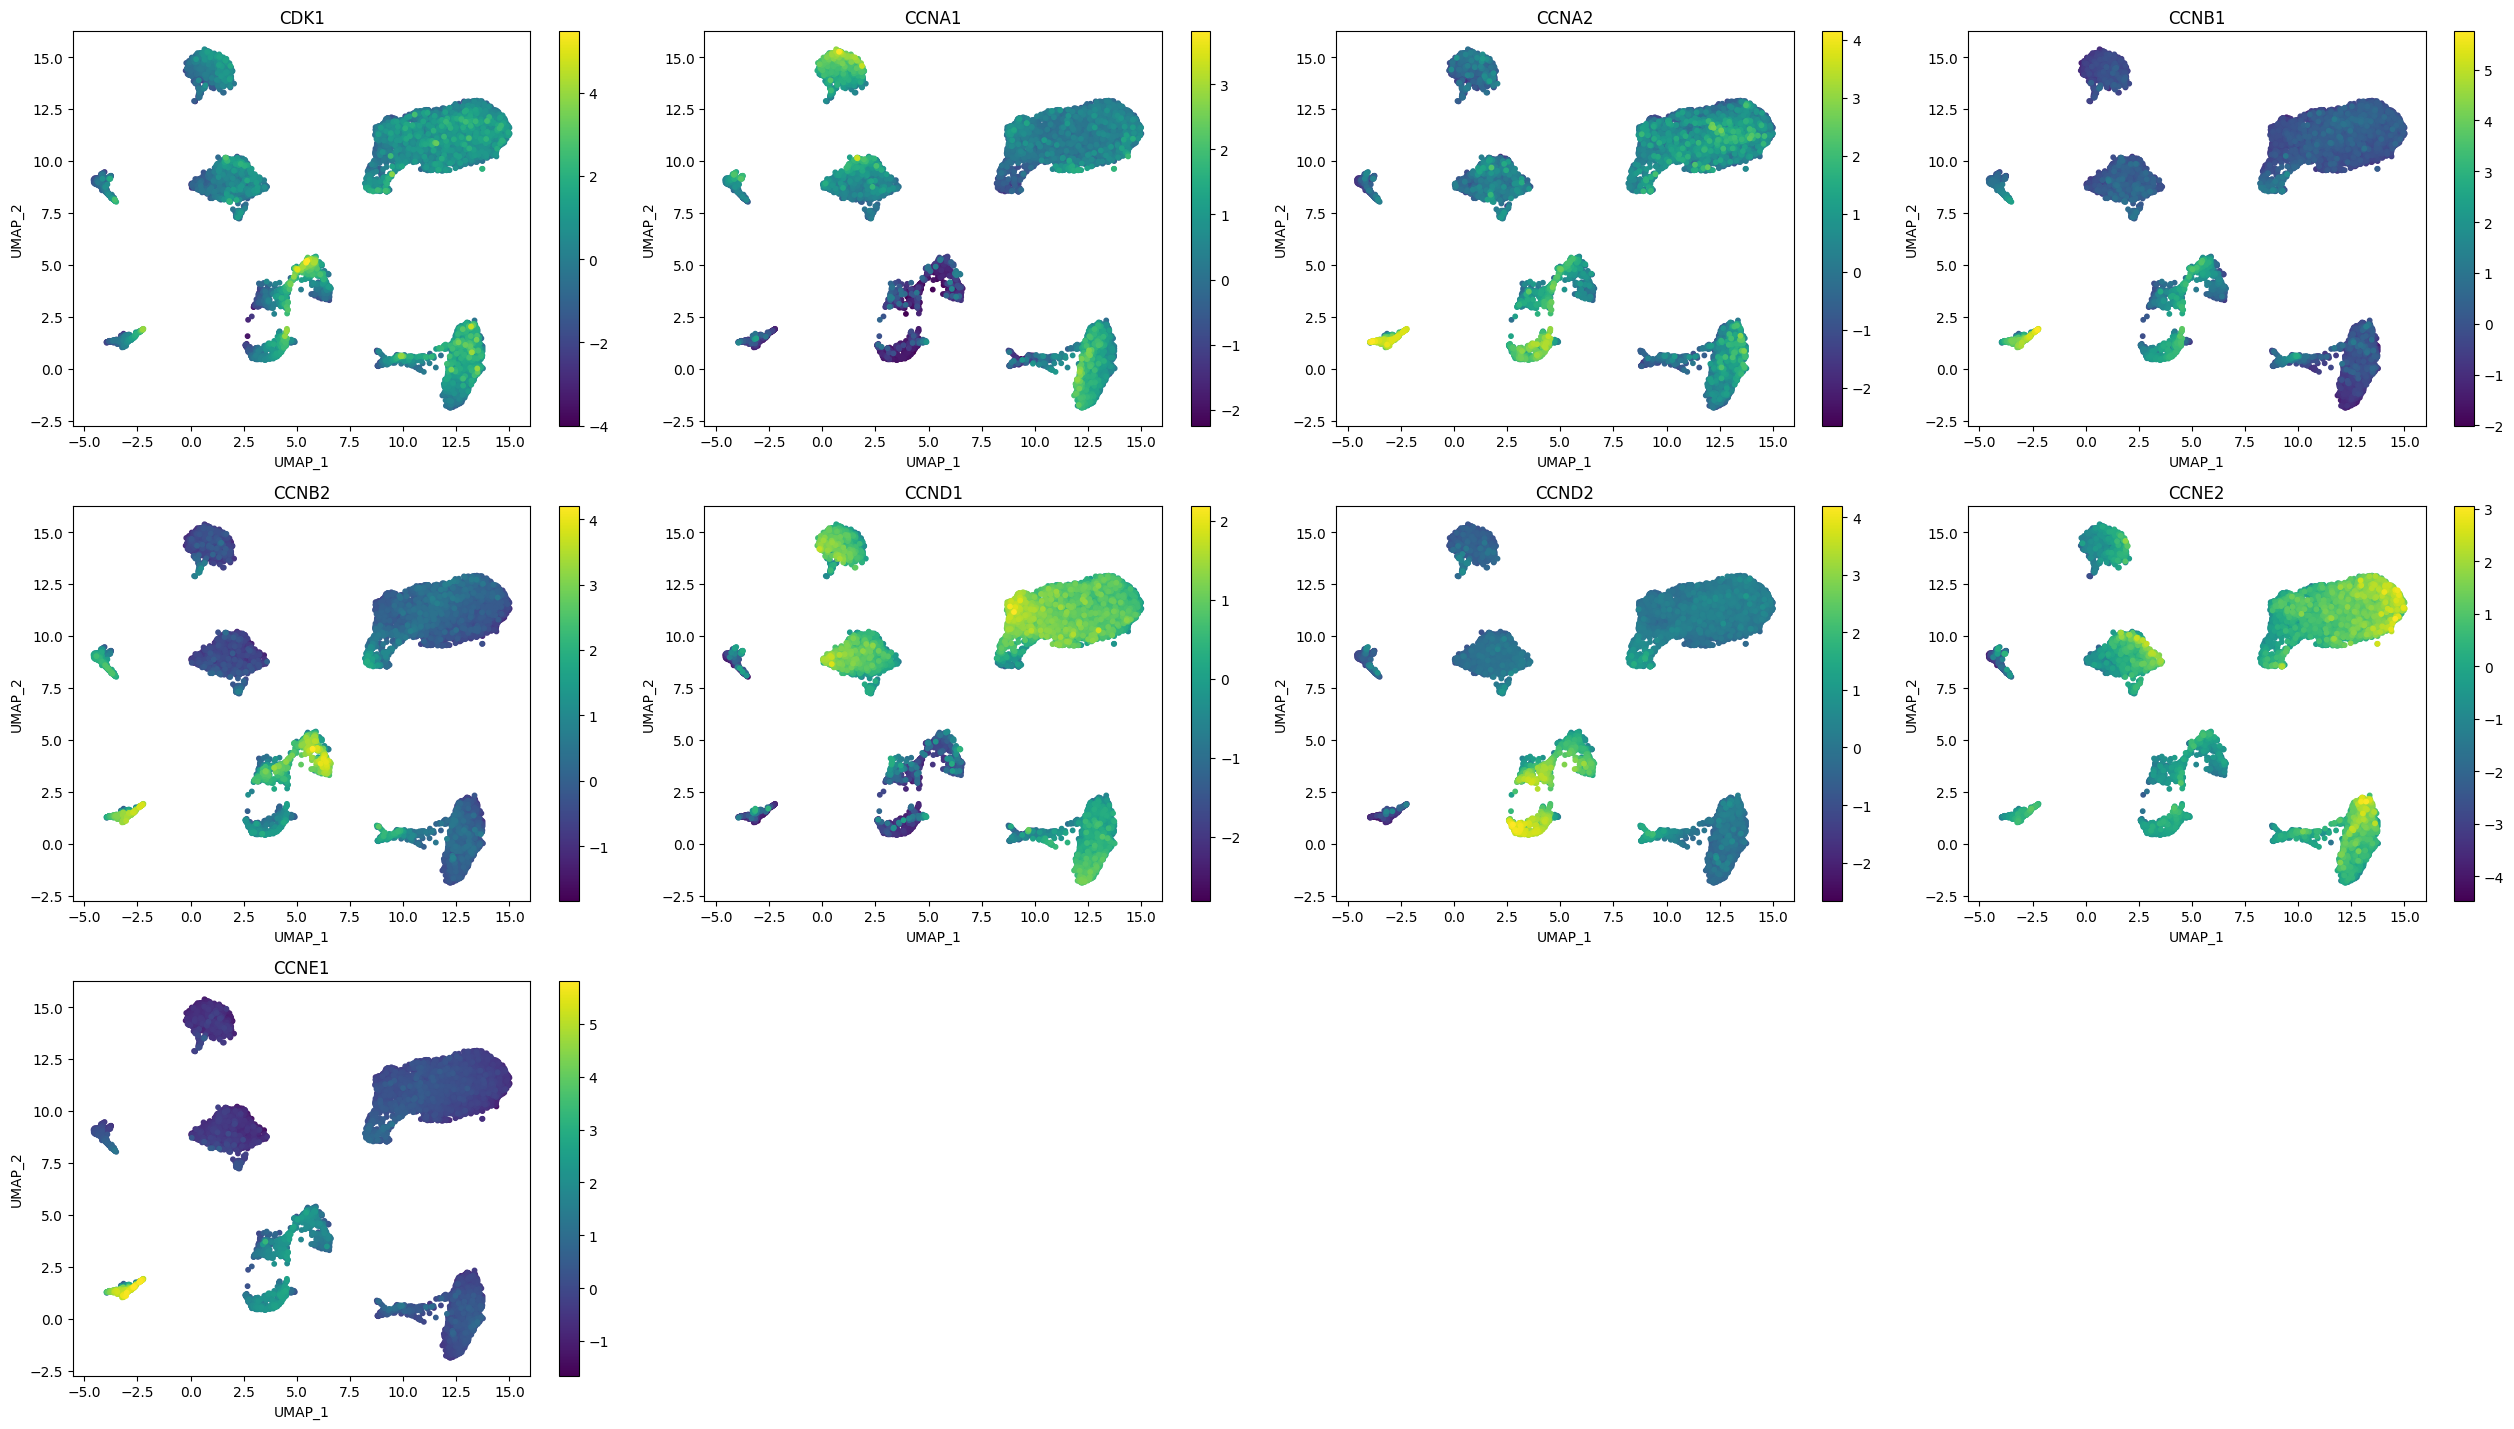

In [81]:
# cell cycle
plot_imputed_features(
    cistopic_obj,
    reduction_name='UMAP',
    imputed_data=gene_act,
    features=['CDK1',
              'CCNA1','CCNA2',
              'CCNB1','CCNB2',
              'CCND1','CCND2',
              'CCNE2','CCNE1'],
    scale=True,
    num_columns=4
)

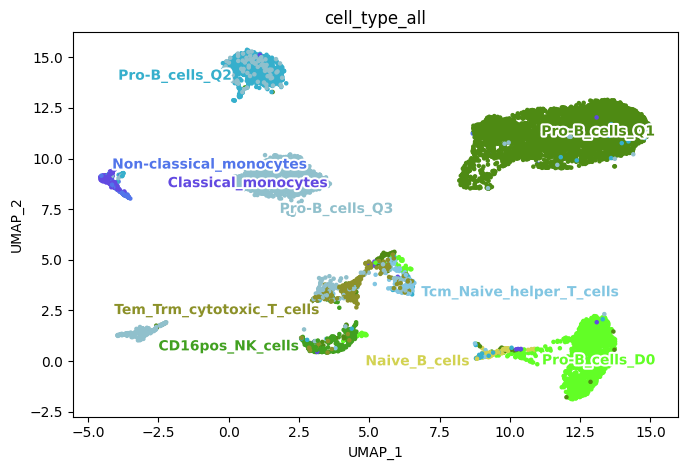

In [82]:
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['cell_type_all'],
    target='cell', num_columns=4,
    text_size=10,
    dot_size=5)

In [83]:
print("Number of DAGs found:")
print("---------------------")
for x in markers_dict:
    print(f"  {x}: {len(DAG_markers_dict[x])}")

Number of DAGs found:
---------------------
  CD16pos_NK_cells: 4252
  Classical_monocytes: 2299
  Naive_B_cells: 3020
  Non-classical_monocytes: 2231
  Pro-B_cells_D0: 648
  Pro-B_cells_Q1: 642
  Pro-B_cells_Q2: 791
  Pro-B_cells_Q3: 417
  Tcm_Naive_helper_T_cells: 3747
  Tem_Trm_cytotoxic_T_cells: 4536


In [84]:
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "cistopic_obj.pkl"), "wb")
)

## Save object to anndata 

In [ ]:
import scanpy as sc
ad = sc.AnnData(
    X = cistopic_obj.binary_matrix.T,
    obs = cistopic_obj.cell_data,
    var = cistopic_obj.region_data,
    obsm = {
	embedding: cistopic_obj.projections["cell"][embedding].values
        for embedding in cistopic_obj.projections["cell"].keys()}
)

In [86]:
ad

AnnData object with n_obs × n_vars = 10268 × 190760
    obs: 'barcode_rank', 'fraction_of_fragments_in_peaks', 'cisTopic_nr_acc', 'log10_unique_fragments_count', 'duplication_count', 'tss_enrichment', 'cisTopic_log_nr_acc', 'pdf_values_for_duplication_ratio', 'cisTopic_nr_frag', 'pdf_values_for_tss_enrichment', 'log10_total_fragments_in_peaks_count', 'pdf_values_for_fraction_of_fragments_in_peaks', 'log10_total_fragments_count', 'total_fragments_count', 'doublets_atac', 'unique_fragments_count', 'cisTopic_log_nr_frag', 'unique_fragments_in_peaks_count', 'barcode', 'duplication_ratio', 'log10_unique_fragments_in_peaks_count', 'doublet_outlier', 'total_fragments_in_peaks_count', 'cell_type', 'sample_id', 'pycisTopic_leiden_10_0.2', 'pycisTopic_leiden_10_0.3', 'pycisTopic_leiden_10_0.6', 'pycisTopic_leiden_10_1.2', 'pycisTopic_leiden_10_3', 'pycisTopic_leiden_10_6', 'is_nan', 'cell_type_all'
    var: 'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTo

In [ ]:
ad.obsm = {key.lower(): value for key, value in ad.obsm.items()} # put obsm keys to lower to be working in scanpy

In [88]:
ad

AnnData object with n_obs × n_vars = 10268 × 190760
    obs: 'barcode_rank', 'fraction_of_fragments_in_peaks', 'cisTopic_nr_acc', 'log10_unique_fragments_count', 'duplication_count', 'tss_enrichment', 'cisTopic_log_nr_acc', 'pdf_values_for_duplication_ratio', 'cisTopic_nr_frag', 'pdf_values_for_tss_enrichment', 'log10_total_fragments_in_peaks_count', 'pdf_values_for_fraction_of_fragments_in_peaks', 'log10_total_fragments_count', 'total_fragments_count', 'doublets_atac', 'unique_fragments_count', 'cisTopic_log_nr_frag', 'unique_fragments_in_peaks_count', 'barcode', 'duplication_ratio', 'log10_unique_fragments_in_peaks_count', 'doublet_outlier', 'total_fragments_in_peaks_count', 'cell_type', 'sample_id', 'pycisTopic_leiden_10_0.2', 'pycisTopic_leiden_10_0.3', 'pycisTopic_leiden_10_0.6', 'pycisTopic_leiden_10_1.2', 'pycisTopic_leiden_10_3', 'pycisTopic_leiden_10_6', 'is_nan', 'cell_type_all'
    var: 'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTo

... storing 'barcode' as categorical
... storing 'cell_type' as categorical
... storing 'sample_id' as categorical
... storing 'pycisTopic_leiden_10_0.2' as categorical
... storing 'pycisTopic_leiden_10_0.3' as categorical
... storing 'pycisTopic_leiden_10_0.6' as categorical
... storing 'pycisTopic_leiden_10_1.2' as categorical
... storing 'pycisTopic_leiden_10_3' as categorical
... storing 'pycisTopic_leiden_10_6' as categorical
... storing 'cell_type_all' as categorical
... storing 'Chromosome' as categorical
/opt/venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


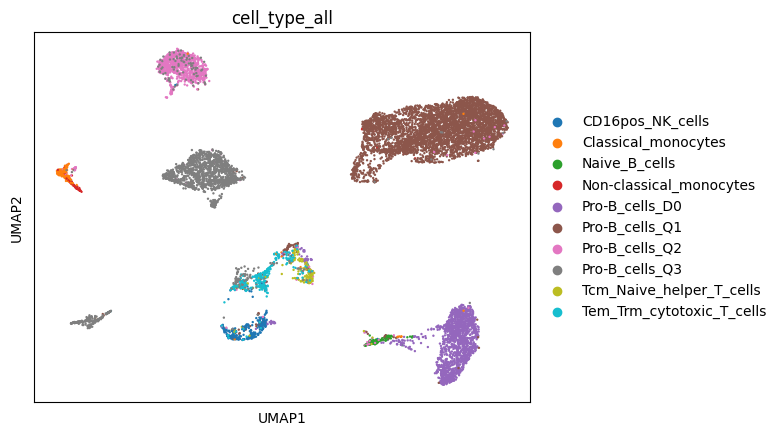

In [89]:
sc.pl.umap(ad, color ="cell_type_all")

In [90]:
ad.obs

barcode_rank  fraction_of_fragments_in_peaks  \
GTCTAGCTCCAGGATG-D0___D0          1403                        0.696985   
CACGGTTTCGTTAGTT-D0___D0          1118                        0.681807   
AAGTGAACATTGTGAG-D0___D0          1130                        0.720803   
AAAGGGATCGTCCTAA-D0___D0          1559                        0.714344   
ACAGCACCAAAGGTAA-D0___D0           930                        0.691150   
...                                ...                             ...   
GGAAGTAAGGTGGGAG-Q3___Q3          2361                        0.717342   
GCATTACGTAAGTGGC-Q3___Q3          2370                        0.478161   
GAGGGTGAGGTATGGT-Q3___Q3          2478                        0.680068   
TGGACCAAGGTTGTAA-Q3___Q3          2350                        0.728623   
CGGCTAGCATCCTAGT-Q3___Q3          2349                        0.595860   

                         cisTopic_nr_acc  log10_unique_fragments_count  \
GTCTAGCTCCAGGATG-D0___D0            3833                      3.763877   
CACGGTTTCGTTAGTT-D0___D0            5172                      3.910998   
AAGTGAACATTGTGAG-D0___D0            5523                      3.904391   
AAAGGGATCGTCCTAA-D0___D0            3373                      3.687886   
ACAGCACCAAAGGTAA-D0___D0            7075                      4.039850   
...                                  ...                           ...   
GGAAGTAAGGTGGGAG-Q3___Q3            1539                      3.342028   
GCATTACGTAAGTGGC-Q3___Q3             980                      3.337659   
GAGGGTGAGGTATGGT-Q3___Q3            1203                      3.247237   
TGGACCAAGGTTGTAA-Q3___Q3            1583                      3.346939   
CGGCTAGCATCCTAGT-Q3___Q3            1336                      3.346939   

                          duplication_count  tss_enrichment  \
GTCTAGCTCCAGGATG-D0___D0               1749       20.061720   
CACGGTTTCGTTAGTT-D0___D0               2353       18.499067   
AAGTGAACATTGTGAG-D0___D0               2315       17.083343   
AAAGGGATCGTCCTAA-D0___D0               1488       26.667670   
ACAGCACCAAAGGTAA-D0___D0               3157       16.882171   
...                                     ...             ...   
GGAAGTAAGGTGGGAG-Q3___Q3               1071       13.521482   
GCATTACGTAAGTGGC-Q3___Q3                905       13.003755   
GAGGGTGAGGTATGGT-Q3___Q3                877       15.620820   
TGGACCAAGGTTGTAA-Q3___Q3               1046       18.044076   
CGGCTAGCATCCTAGT-Q3___Q3                957       11.784702   

                         cisTopic_log_nr_acc  \
GTCTAGCTCCAGGATG-D0___D0            3.583539   
CACGGTTTCGTTAGTT-D0___D0            3.713659   
AAGTGAACATTGTGAG-D0___D0            3.742175   
AAAGGGATCGTCCTAA-D0___D0            3.528016   
ACAGCACCAAAGGTAA-D0___D0            3.849726   
...                                      ...   
GGAAGTAAGGTGGGAG-Q3___Q3            3.187239   
GCATTACGTAAGTGGC-Q3___Q3            2.991226   
GAGGGTGAGGTATGGT-Q3___Q3            3.080266   
TGGACCAAGGTTGTAA-Q3___Q3            3.199481   
CGGCTAGCATCCTAGT-Q3___Q3            3.125806   

                          pdf_values_for_duplication_ratio cisTopic_nr_frag  \
GTCTAGCTCCAGGATG-D0___D0                         13.634188             4309   
CACGGTTTCGTTAGTT-D0___D0                         21.064461             5971   
AAGTGAACATTGTGAG-D0___D0                         20.992568             6296   
AAAGGGATCGTCCTAA-D0___D0                          9.928649             3763   
ACAGCACCAAAGGTAA-D0___D0                         20.009237             8168   
...                                                    ...              ...   
GGAAGTAAGGTGGGAG-Q3___Q3                         10.617857             1728   
GCATTACGTAAGTGGC-Q3___Q3                          4.243089             1123   
GAGGGTGAGGTATGGT-Q3___Q3                          3.498081             1309   
TGGACCAAGGTTGTAA-Q3___Q3                         19.379643             1755   
CGGCTAGCATCCTAGT-Q3___Q3                     

In [91]:
ad.obs.dtypes

barcode_rank                                       uint32
fraction_of_fragments_in_peaks                    float64
cisTopic_nr_acc                                    object
log10_unique_fragments_count                      float64
duplication_count                                   int64
tss_enrichment                                    float64
cisTopic_log_nr_acc                                object
pdf_values_for_duplication_ratio                  float64
cisTopic_nr_frag                                   object
pdf_values_for_tss_enrichment                     float64
log10_total_fragments_in_peaks_count              float64
pdf_values_for_fraction_of_fragments_in_peaks     float64
log10_total_fragments_count                       float64
total_fragments_count                               int32
doublets_atac                                        bool
unique_fragments_count                             uint32
cisTopic_log_nr_frag                               object
unique_fragmen

In [92]:
ad.obs = ad.obs.apply(lambda col: col.astype(float) if col.dtype == 'object' else col)

In [93]:
ad.obs

barcode_rank  fraction_of_fragments_in_peaks  \
GTCTAGCTCCAGGATG-D0___D0          1403                        0.696985   
CACGGTTTCGTTAGTT-D0___D0          1118                        0.681807   
AAGTGAACATTGTGAG-D0___D0          1130                        0.720803   
AAAGGGATCGTCCTAA-D0___D0          1559                        0.714344   
ACAGCACCAAAGGTAA-D0___D0           930                        0.691150   
...                                ...                             ...   
GGAAGTAAGGTGGGAG-Q3___Q3          2361                        0.717342   
GCATTACGTAAGTGGC-Q3___Q3          2370                        0.478161   
GAGGGTGAGGTATGGT-Q3___Q3          2478                        0.680068   
TGGACCAAGGTTGTAA-Q3___Q3          2350                        0.728623   
CGGCTAGCATCCTAGT-Q3___Q3          2349                        0.595860   

                          cisTopic_nr_acc  log10_unique_fragments_count  \
GTCTAGCTCCAGGATG-D0___D0           3833.0                      3.763877   
CACGGTTTCGTTAGTT-D0___D0           5172.0                      3.910998   
AAGTGAACATTGTGAG-D0___D0           5523.0                      3.904391   
AAAGGGATCGTCCTAA-D0___D0           3373.0                      3.687886   
ACAGCACCAAAGGTAA-D0___D0           7075.0                      4.039850   
...                                   ...                           ...   
GGAAGTAAGGTGGGAG-Q3___Q3           1539.0                      3.342028   
GCATTACGTAAGTGGC-Q3___Q3            980.0                      3.337659   
GAGGGTGAGGTATGGT-Q3___Q3           1203.0                      3.247237   
TGGACCAAGGTTGTAA-Q3___Q3           1583.0                      3.346939   
CGGCTAGCATCCTAGT-Q3___Q3           1336.0                      3.346939   

                          duplication_count  tss_enrichment  \
GTCTAGCTCCAGGATG-D0___D0               1749       20.061720   
CACGGTTTCGTTAGTT-D0___D0               2353       18.499067   
AAGTGAACATTGTGAG-D0___D0               2315       17.083343   
AAAGGGATCGTCCTAA-D0___D0               1488       26.667670   
ACAGCACCAAAGGTAA-D0___D0               3157       16.882171   
...                                     ...             ...   
GGAAGTAAGGTGGGAG-Q3___Q3               1071       13.521482   
GCATTACGTAAGTGGC-Q3___Q3                905       13.003755   
GAGGGTGAGGTATGGT-Q3___Q3                877       15.620820   
TGGACCAAGGTTGTAA-Q3___Q3               1046       18.044076   
CGGCTAGCATCCTAGT-Q3___Q3                957       11.784702   

                          cisTopic_log_nr_acc  \
GTCTAGCTCCAGGATG-D0___D0             3.583539   
CACGGTTTCGTTAGTT-D0___D0             3.713659   
AAGTGAACATTGTGAG-D0___D0             3.742175   
AAAGGGATCGTCCTAA-D0___D0             3.528016   
ACAGCACCAAAGGTAA-D0___D0             3.849726   
...                                       ...   
GGAAGTAAGGTGGGAG-Q3___Q3             3.187239   
GCATTACGTAAGTGGC-Q3___Q3             2.991226   
GAGGGTGAGGTATGGT-Q3___Q3             3.080266   
TGGACCAAGGTTGTAA-Q3___Q3             3.199481   
CGGCTAGCATCCTAGT-Q3___Q3             3.125806   

                          pdf_values_for_duplication_ratio  cisTopic_nr_frag  \
GTCTAGCTCCAGGATG-D0___D0                         13.634188            4309.0   
CACGGTTTCGTTAGTT-D0___D0                         21.064461            5971.0   
AAGTGAACATTGTGAG-D0___D0                         20.992568            6296.0   
AAAGGGATCGTCCTAA-D0___D0                          9.928649            3763.0   
ACAGCACCAAAGGTAA-D0___D0                         20.009237            8168.0   
...                                                    ...               ...   
GGAAGTAAGGTGGGAG-Q3___Q3                         10.617857            1728.0   
GCATTACGTAAGTGGC-Q3___Q3                          4.243089            1123.0   
GAGGGTGAGGTATGGT-Q3___Q3                          3.498081            1309.0   
TGGACCAAGGTTGTAA-Q3___Q3                         19.379643            1755.0   
CGGCTAGCAT

In [94]:
import datetime
date = datetime.datetime.now().strftime('%Y%m%d')
ad.write(f'./outs/{date}_atac_ball_processed.h5ad')

In [95]:
pip list

Package                              Version
------------------------------------ -----------------
adjustText                           1.0.4
aiohttp                              3.9.3
aiosignal                            1.3.1
anndata                              0.10.5.post1
annoy                                1.17.3
appdirs                              1.4.4
arboreto                             0.1.6
argparse-dataclass                   2.0.0
array_api_compat                     1.5.1
asttokens                            2.4.1
attr                                 0.3.2
attrs                                23.2.0
bbknn                                1.6.0
beautifulsoup4                       4.12.3
bidict                               0.23.1
bioservices                          1.11.2
blosc2                               2.5.1
bokeh                                3.4.0
boltons                              23.1.1
bs4                                  0.0.2
cattrs                     